# Computational Linear Algebra: PCA Homework

## Initialization:
Fill the missing values in this text box and in the following code-cell.

**Academic Year:** 2024/2025

### Team Members (Alphabetical Order):
1. Spanio, Lorenzo (327504);


In [1]:
StudentID1 = 327504


## Starting Code-Cell 
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

In [2]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type], 
                                               int(2 * (len(variables_by_type[type]) / 3)), 
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)

*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Finance
Interests
Movies
*************************************
*** THESE ARE THE SELECTED FEATURES:
God
Number of friends
Thinking ahead
Dreams
Achievements
Personality
Health
Writing notes
Changing the past
Life struggles
Socializing
Decision making
Empathy
Appearence and gestures
Knowing the right people
Responding to a serious letter
Lying
Assertiveness
Judgment calls
Compassion to animals
Funniness
Keeping promises
Prioritising workload
Daily events
Cheating in school
Charity
Final judgement
Public speaking
Getting angry
New environment
Friends versus money
Giving
Elections
Mood swings
Criminal damage
Waiting
Energy levels
Getting up
Smoking
Alcohol
Healthy eating
Finances
Shopping centres
Branded clothing
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
History
Psychology
Politics
Mathematics
Physics
Internet
PC
Economy Management
Biology
Chemistry
Reading
Geography
Foreign lang

## Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.
No extra modules are allowed for reproducibility.

In [3]:
# DO NOT IMPORT NUMPY
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
import yaml
from IPython.display import display  # to display variables in a "nice" way



## Exercise 1. Preparing the Dataset

In the cells below, do the following operations:
1. load the dataset "_responses_hw.csv_";
2. create a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;
3. analyze the obtained dataframe and performing cleansing/encoding operations.

In [4]:
my_data= pd.read_csv("responses_hw.csv")
labels_dataset=my_data.loc[:,variables_by_type['Demographics']]

my_data=my_data.loc[:,these_features]
X_df = my_data.sample(frac=2/3, random_state = random_seed) # I create the dataset with 2/3 of the total
X_df=X_df.reset_index(drop=True)



labels_dataset=labels_dataset.sample(frac=2/3, random_state = random_seed) # I do the same with the labels 
labels_dataset=labels_dataset.reset_index(drop=True) 


pd.options.display.max_columns = 200
pd.set_option('display.max_rows', 15)  # Limit the number of rows
pd.set_option('display.max_columns', None)

# Before substituting the categorical values we address the issue of NaN



#total_NaN = X_df.isna().to_numpy().sum() # In total we have 232 NaN
# they are distributed this way:
#rows_with_nan = X_df.isna().any(axis=1).sum() # 158 rows with at least one Nan
#columns_with_nan = X_df.isna().any(axis=0).sum() # 80 columns have at least one NaN



# Since there is no way of knowing the responses that are missing and we can't easly interpolate
# we therefore remove all the rows that contain at least one NaN

original_row_mask = ~X_df.isna().any(axis=1) # we create a mask to eliminate the rows also in the labels dataset
labels_dataset=labels_dataset[original_row_mask]
#rows_with_nan_labels = labels_dataset.isna().any(axis=1).sum()
labels_dataset=labels_dataset.reset_index(drop=True)


# we eliminate the Nan in the dataset
X_df=X_df.dropna()
X_df=X_df.reset_index(drop=True)


# Here in X_df we eliminate the rows that in the labels dataset have at leat one row NaN. In order to eliminate completely the dataset from NaN
original_row_mask2 = ~labels_dataset.isna().any(axis=1)
labels_dataset=labels_dataset.dropna()
labels_dataset=labels_dataset.reset_index(drop=True)

X_df=X_df[original_row_mask2]
X_df=X_df.reset_index(drop=True)



# we change the chategorical elements for the feature: "Lying". 
# Here's the options: Only to avoid hurting someone.- Sometimes.- Everytime it suits me.
# since there is a progression it is resonable to give respectivly these values: 0, 1, 2 


category_mapping = {
    "never": 1,
    "only to avoid hurting someone": 2,
    "sometimes": 3,
    "everytime it suits me": 4
}
X_df["Lying"] = X_df["Lying"].map(category_mapping)

# unmapped_values = sum(X_df["Lying"].isnull())  in order to check that they are substituted correctly
# we know deal with the same progressive appoach with "Smoking":

category_mapping2 = {
    "never smoked": 1,
    "tried smoking": 2,
    "former smoker": 3,
    "current smoker": 4
}
X_df["Smoking"] = X_df["Smoking"].map(category_mapping2)

# we do the same with the last one:"Alcohol":
category_mapping3 = {
    "never": 1,
    "social drinker":2,
    "drink a lot": 3
}
X_df["Alcohol"] = X_df["Alcohol"].map(category_mapping3)
display(X_df)



# we do the same in the labels dataset to change the cathegorical features in the Education and Home Town Type
category_mapping_education = {
    "currently a primary school pupil":1,
    "primary school": 2,
    "secondary school": 3,
    "college/bachelor degree": 4,
    "masters degree": 5,
    "doctorate degree": 6

}
labels_dataset["Education"] = labels_dataset["Education"].map(category_mapping_education)


category_mapping_home_town_type = {
    "city":1,
    "village": 2,
}
labels_dataset["Home Town Type"] = labels_dataset["Home Town Type"].map(category_mapping_home_town_type)



God  Number of friends  Thinking ahead  Dreams  Achievements  \
0    4.0                  3             3.0       3           4.0   
1    5.0                  5             2.0       2           2.0   
2    2.0                  4             3.0       4           3.0   
3    1.0                  2             2.0       3           2.0   
4    4.0                  4             3.0       3           3.0   
..   ...                ...             ...     ...           ...   
490  4.0                  3             3.0       3           3.0   
491  1.0                  5             3.0       3           3.0   
492  1.0                  3             3.0       3           3.0   
493  5.0                  4             5.0       3           3.0   
494  4.0                  3             2.0       3           3.0   

     Personality  Health  Writing notes  Changing the past  Life struggles  \
0            3.0     2.0            3.0                5.0             5.0   
1            2.0     2.0            3.0                5.0             5.0   
2            3.0     2.0            2.0                3.0             5.0   
3            4.0     5.0            1.0                2.0             1.0   
4            3.0     3.0            2.0                1.0             2.0   
..           ...     ...            ...                ...             ...   
490          3.0     4.0            4.0                2.0             2.0   
491          3.0     3.0            3.0                2.0             1.0   
492          3.0     2.0            2.0                2.0             1.0   
493          3.0     5.0            1.0                5.0             1.0   
494          3.0     4.0            2.0                4.0             4.0   

     Socializing  Decision making  Empathy  Appearence and gestures  \
0            3.0              4.0      4.0                      3.0   
1            2.0              2.0      5.0                      5.0   
2            2.0              3.0      5.0                      4.0   
3            2.0              1.0      3.0                      2.0   
4            1.0              3.0      3.0                      3.0   
..           ...              ...      ...                      ...   
490          1.0              4.0      2.0                      4.0   
491          4.0              3.0      4.0                      4.0   
492          3.0              2.0      2.0                      3.0   
493          3.0              3.0      5.0                      4.0   
494          4.0              3.0      5.0                      4.0   

     Knowing the right people  Responding to a serious letter  Lying  \
0                         3.0                             3.0      2   
1                         3.0                             4.0      4   
2                         2.0                             2.0      3   
3                         3.0                             5.0      3   
4                         3.0                             5.0      3   
..                        ...                             ...    ...   
490                       2.0                             3.0      3   
491                       4.0                             3.0      3   
492                       3.0                             3.0      4   
493                       5.0                             3.0      3   
494                       3.0                             4.0      3   

     Assertiveness  Judgment calls  Compassion to animals  Funniness  \
0              5.0             3.0                    5.0        3.0   
1              2.0             4.0                    5.0        3.0   
2              4.0             4.0                    5.0        3.0   
3              5.0             3.0                    5.0        4.0   
4              3.0             5.0                    4.0        4.0   
..             ...             ...                    ...        ...   
490            3.

## Exercise 2. Analyzing the Variance and the PCs

In the cells below, do the following operations:
1. create two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Call these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;
2. compute the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **comment the results**;
3. compute all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualize the curves of the cumulative explained variances and **comment the results**.

In [5]:
X_df_copy=X_df.copy() # we make a copy just to be safe


variance_original=X_df_copy.var(axis=0)

# the variance of each features is in general quite small, usually [0.5-2]. It's a close range of values becuase most 
# of the data is stored with integer values from 1 to 5. So the low variance is expected. The values that have the least variance are the ones
# that have only options 1 to 4. In particular the Alcohol features have values only from 1 to 3therefore has the least variance.


# Using StandardScaler
scaler=StandardScaler()
scaler.fit(X_df_copy)
Xstd_df=scaler.transform(X_df_copy)
Xstd_df = pd.DataFrame(Xstd_df, columns=these_features)
#mean=Xstd_df.mean(axis=0)
variance_scaler=Xstd_df.var(axis=0)

# Since here we have standardized the expected result of all the variances is in fact a vector of all ones and is exacly what we obtain 

# Using MinMaxScaler
MinMax=MinMaxScaler()
Xmm_df=MinMax.fit_transform(X_df_copy)
Xmm_df = pd.DataFrame(Xmm_df, columns=these_features)
variance_minmax=Xmm_df.var(axis=0)



We use the standarziation for each column to create Xstd_df.

To create Xmm_df we use Minmax, alinear transformation that compresses the interval between 0 and 1. The original data 
was instead in the range 1 to 5 for most of the features, the result is that the new data has now a way smaller variance 
becuase the distance from the mean of the new data is in a closer range [0-1].
The length of the interval goes from 4 to 1 so the reduction of the variance is the same as dividing the original one by a factor of 4^2.
The mean of the variance of the original data was 1.5 and the new one across all features is 0.09 (so it makes sense since 1.5/16 is 
close to 0.09).

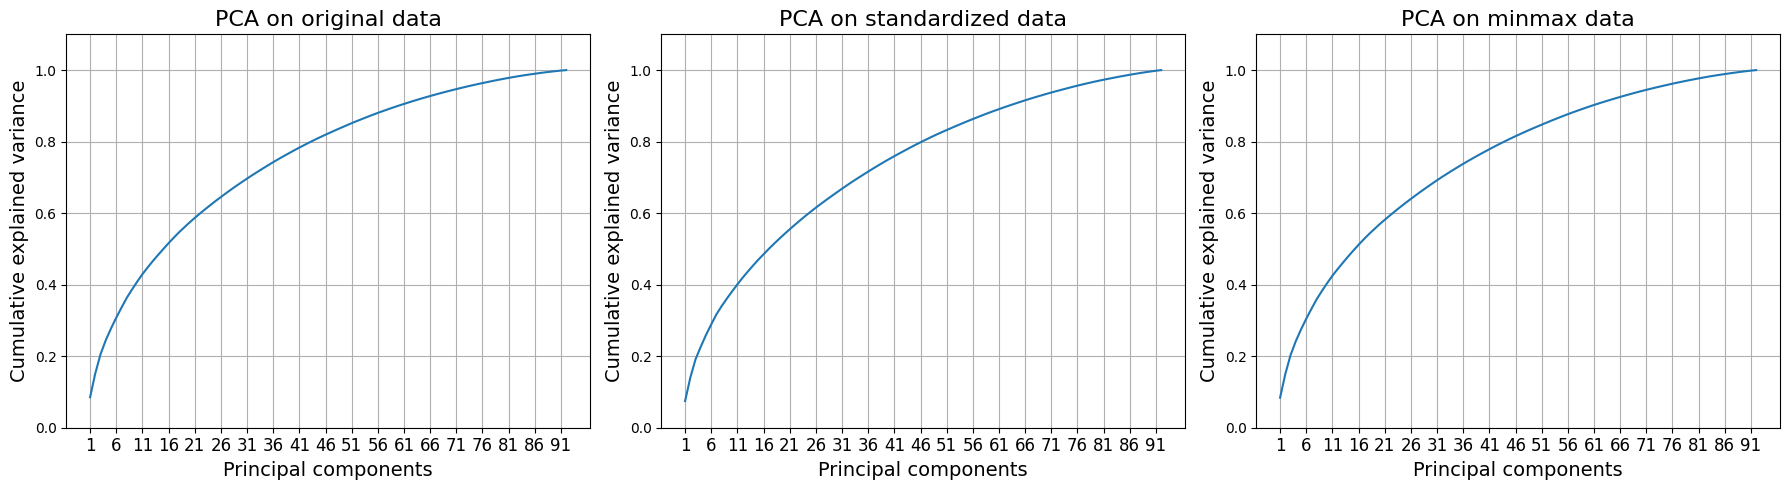

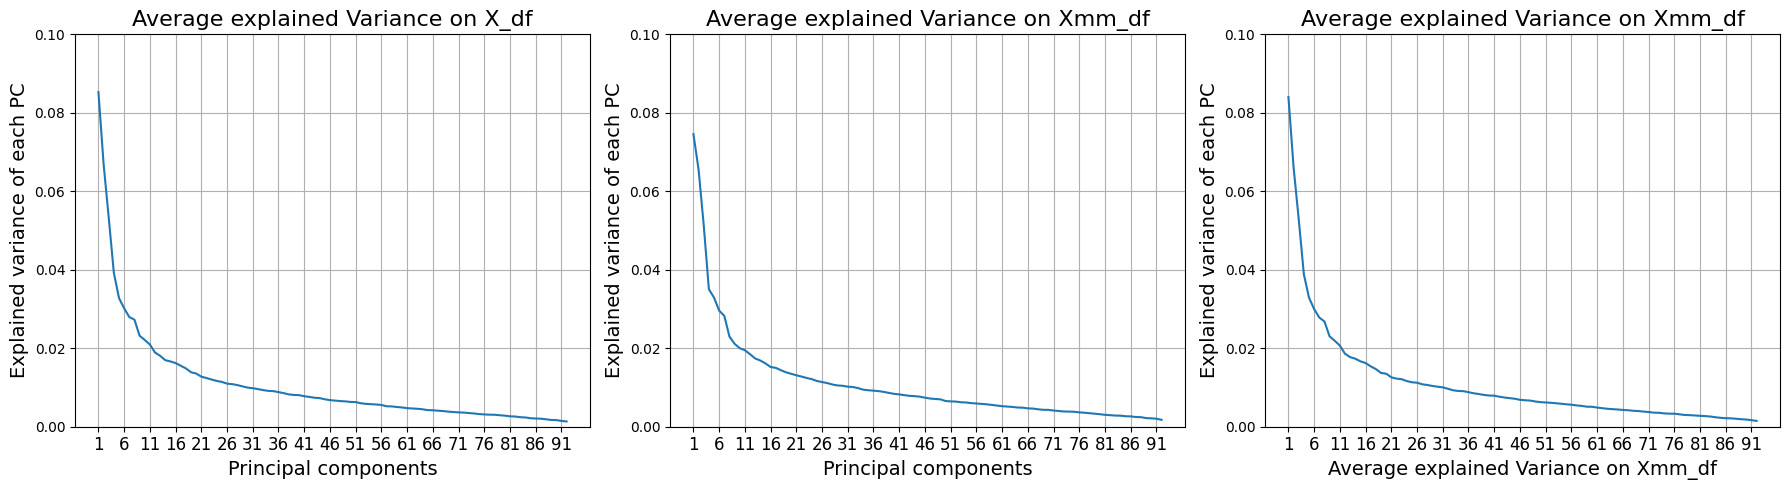

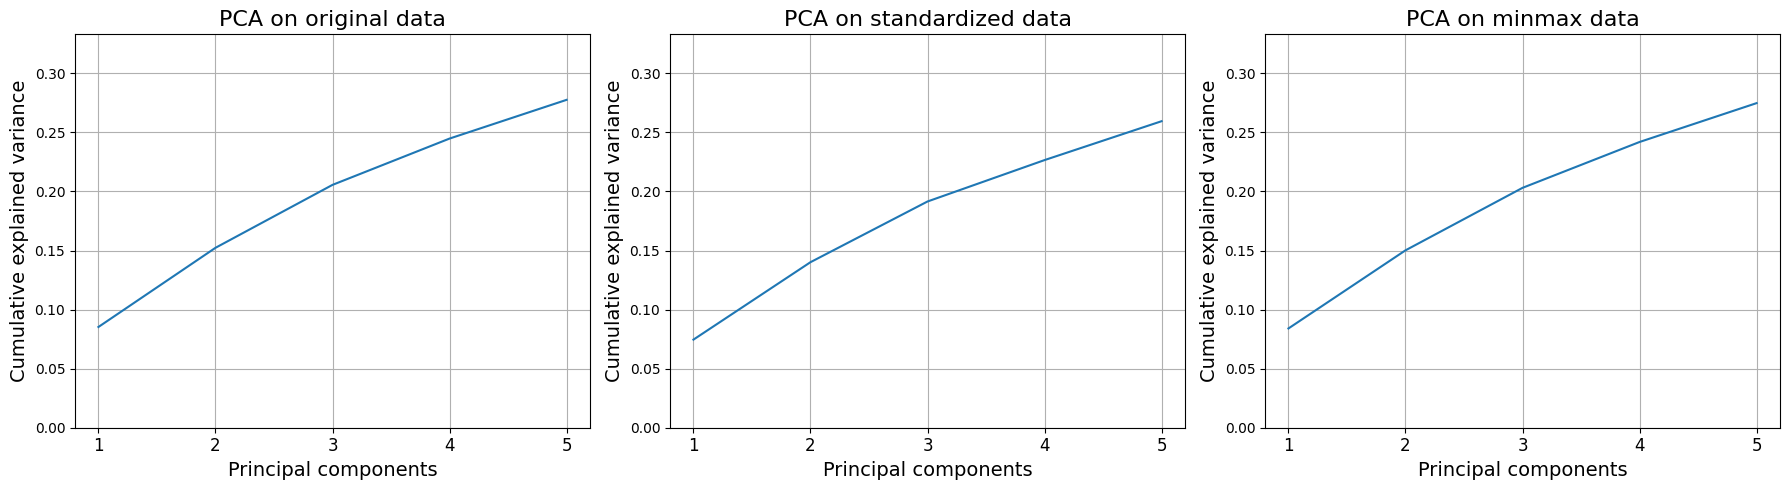

In [6]:
# We use now PCA for all the features on the original data:
# PCA on the original data
pca_original = PCA()
pca_original.fit(X_df)

# PCA on the standardized data
pca_standard = PCA()
pca_standard.fit(Xstd_df)

# PCA on the MinMax transformed data
pca_minmax = PCA()
pca_minmax.fit(Xmm_df)

# Create a single figure with 3 subplots in a row (1 row, 3 columns)
plt.figure(figsize=(18, 5))  # Set the figure size to (18, 5)

# Plot 1: PCA on the original data
plt.subplot(1, 3, 1)  # 1 row 3 columns
plt.plot(np.cumsum(pca_original.explained_variance_ratio_))
plt.title('PCA on original data', fontsize=16)
plt.ylim([0, 1.1])


interval = 5  
ticks = np.arange(0, X_df.shape[1], interval)  
labels = [f'{i + 1}' for i in ticks]  
plt.xticks(ticks=ticks, labels=labels, fontsize=12)
plt.xlabel('Principal components', fontsize=14)
plt.ylabel('Cumulative explained variance', fontsize=14)
plt.grid()

# Plot 2: PCA on the standardized data
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd plot
plt.plot(np.cumsum(pca_standard.explained_variance_ratio_))
plt.title('PCA on standardized data', fontsize=16)
plt.ylim([0, 1.1])


interval = 5  
ticks = np.arange(0, Xmm_df.shape[1], interval)  
labels = [f'{i + 1}' for i in ticks]  
plt.xticks(ticks=ticks, labels=labels, fontsize=12)
plt.xlabel('Principal components', fontsize=14)
plt.ylabel('Cumulative explained variance', fontsize=14)
plt.grid()



# Plot 3: PCA on the MinMax transformed data
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd plot
plt.plot(np.cumsum(pca_minmax.explained_variance_ratio_))
plt.title('PCA on minmax data', fontsize=16)
plt.ylim([0, 1.1])


interval = 5  
ticks = np.arange(0, Xmm_df.shape[1], interval)  
labels = [f'{i + 1}' for i in ticks]  
plt.xticks(ticks=ticks, labels=labels, fontsize=12)
plt.xlabel('Principal components', fontsize=14)
plt.ylabel('Cumulative explained variance', fontsize=14)
plt.grid()


plt.tight_layout()
plt.show()





# We plot each the variance explained by each principal component in the 3 cases: 

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# firsrt plot
axes[0].plot(pca_original.explained_variance_ratio_)
axes[0].set_title('Average explained Variance on X_df', fontsize=16)  # Larger title font
axes[0].set_ylim([0, 0.1])


interval = 5  
ticks = np.arange(0, Xmm_df.shape[1], interval) 

axes[0].set_xticks(ticks)
axes[0].set_xticklabels(labels, fontsize=12)  # Apply the ticks and labels
axes[0].set_xlabel('Principal components', fontsize=14)  # Larger x-axis label font
axes[0].set_ylabel('Explained variance of each PC', fontsize=14)  # Larger y-axis label font
axes[0].grid()

# Second plot
axes[1].plot(pca_standard.explained_variance_ratio_)
axes[1].set_title('Average explained Variance on Xmm_df', fontsize=16)  # Larger title font
axes[1].set_ylim([0, 0.1])

 
axes[1].set_xticks(ticks)
axes[1].set_xticklabels(labels, fontsize=12)  # Apply the ticks and labels
axes[1].set_xlabel('Principal components', fontsize=14)  # Larger x-axis label font
axes[1].set_ylabel('Explained variance of each PC', fontsize=14)  # Larger y-axis label font
axes[1].grid()


#    third plot

axes[2].plot(pca_minmax.explained_variance_ratio_)
axes[2].set_title('Average explained Variance on Xmm_df', fontsize=16)  # Larger title font
axes[2].set_ylim([0, 0.1])
interval = 5  
ticks = np.arange(0, Xmm_df.shape[1], interval) 
axes[2].set_xticks(ticks)
axes[2].set_xticklabels(labels, fontsize=12)  # Apply the ticks and labels
axes[2].set_xlabel('Average explained Variance on Xmm_df', fontsize=14)  # Larger x-axis label font
axes[2].set_ylabel('Explained variance of each PC', fontsize=14)  # Larger y-axis label font
axes[2].grid()

plt.tight_layout()
plt.show()





fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# First plot
axes[0].plot(np.cumsum(pca_original.explained_variance_ratio_[:5]))
axes[0].set_title('PCA on original data', fontsize=16)  # Larger title font
axes[0].set_ylim([0, 0.333])
 

ticks = np.arange(0, 5)  
labels = [f'{i + 1}' for i in ticks] 

axes[0].set_xticks(ticks)
axes[0].set_xticklabels(labels, fontsize=12)  # Apply the ticks and labels
axes[0].set_xlabel('Principal components', fontsize=14)  # Larger x-axis label font
axes[0].set_ylabel('Cumulative explained variance', fontsize=14)  # Larger y-axis label font
axes[0].grid()

# Second plot
axes[1].plot(np.cumsum(pca_standard.explained_variance_ratio_[:5]))
axes[1].set_title('PCA on standardized data', fontsize=16)  # Larger title font
axes[1].set_ylim([0, 0.333])
 
axes[1].set_xticks(ticks)
axes[1].set_xticklabels(labels, fontsize=12)  # Apply the ticks and labels
axes[1].set_xlabel('Principal components', fontsize=14)  # Larger x-axis label font
axes[1].set_ylabel('Cumulative explained variance', fontsize=14)  # Larger y-axis label font
axes[1].grid()






axes[2].plot(np.cumsum(pca_minmax.explained_variance_ratio_[:5]))
axes[2].set_title('PCA on minmax data', fontsize=16)  # Larger title font
axes[2].set_ylim([0, 0.333])

ticks = np.arange(0, 5)  
labels = [f'{i + 1}' for i in ticks]  

axes[2].set_xticks(ticks)
axes[2].set_xticklabels(labels, fontsize=12)  # Apply the ticks and labels
axes[2].set_xlabel('Principal components', fontsize=14)  # Larger x-axis label font
axes[2].set_ylabel('Cumulative explained variance', fontsize=14)  # Larger y-axis label font
axes[2].grid()



plt.tight_layout()
plt.show()


Comparison between the curves:
The comulative explained variance have roughly the same concave curve among all three PCAs since the range of values have the same 
scale (ususally integers from 1 to 4) and there is no problem related to features with different unit of measure.

when we compare the explained variance only on the first five components can see that no dataset available can be used to explain the required   0.3333 of the total variance and therefore we are going to use m=5 later.

The variance explained by the principal components is very similitar in all 3 datasets for the same reason as before: the data is quite homogeneuous, in the sense that each feature has the same interval and there is no difficulty comparing the scale of one another.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In the cells below, do the following operations:
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
2. For both the cases, visualize all the PCs and give a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.
3. Perform the score graph for both the cases (_std_ and _mm_). If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs on the axes** for better understanding the results.
4. **Optional:** plot more score graphs, coloring the dots with respect to any label in the list _labels_ that you believe can be interesting. **Comment and analyze this optional plots**.

In order to better present the comparison between Xstf_df and Xmm_df I first present all the analysis on the Xstd_df and later it will be presented the one done for Xmm_df. The comments will be made at the end of the latter.

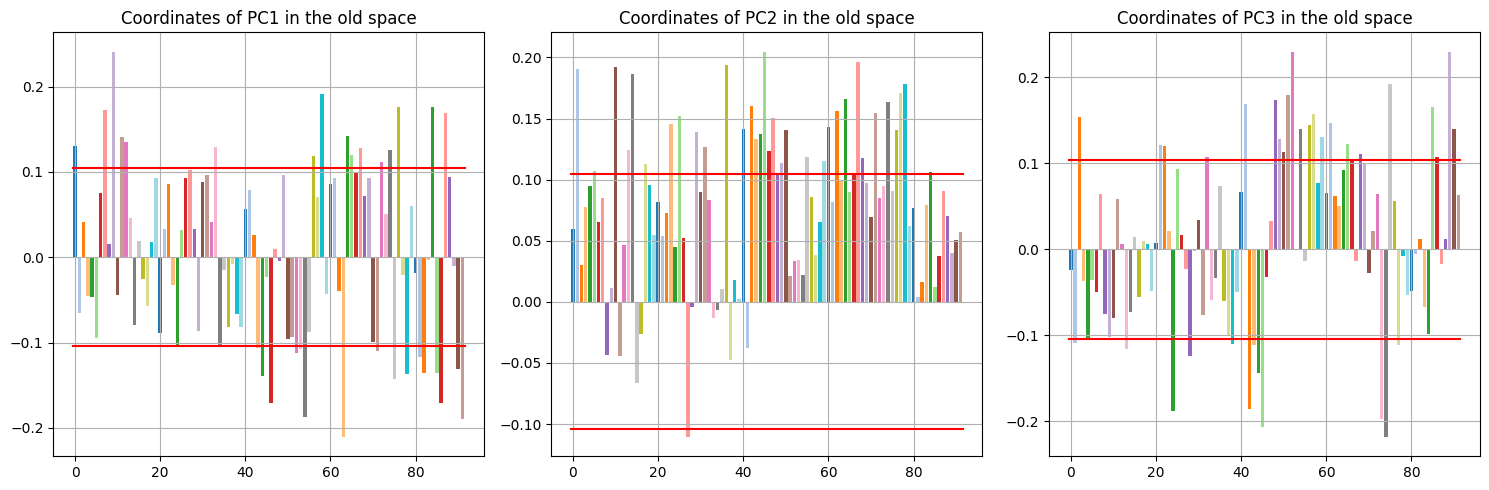

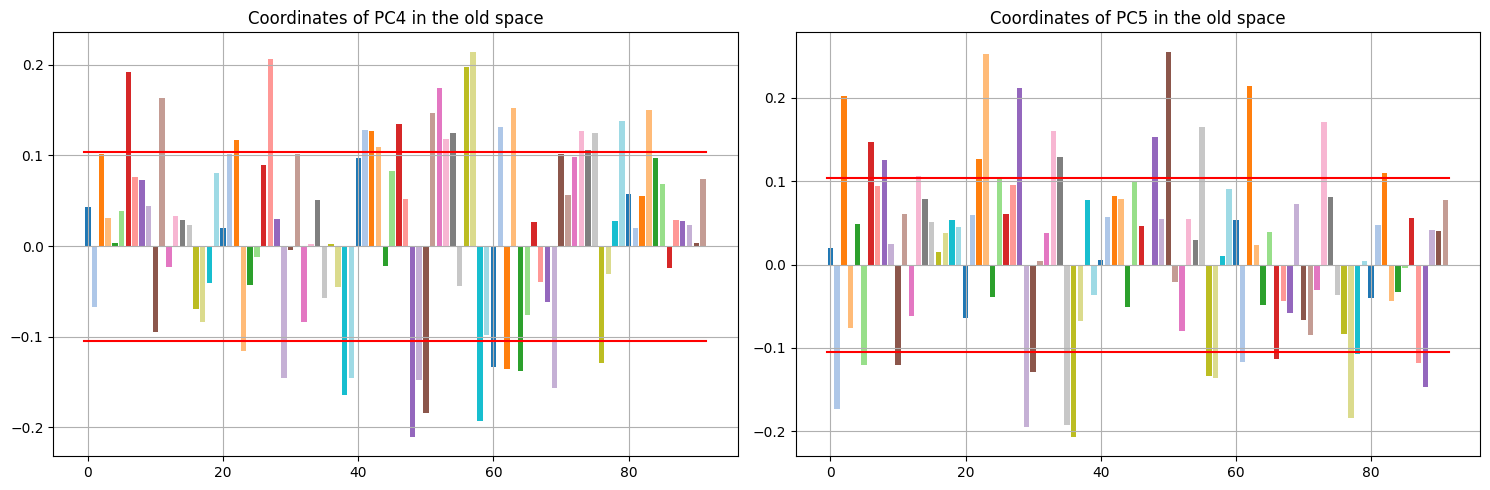

In [7]:

# First the data standardized
pca_standard_reduction= PCA(n_components=5)
pca_standard_reduction.fit(Xstd_df)

# we now transform the dataset in the new space 
y_standard_new=pca_standard_reduction.transform(Xstd_df)

eps = np.sqrt(1 / Xstd_df.shape[1])

colors = cm.tab20.colors
tab20 = cm.tab20.colors


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].bar(np.arange(Xstd_df.shape[1]), pca_standard_reduction.components_[0, :], color=tab20[:Xstd_df.shape[1]])
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
ax[0].plot([-0.5, Xstd_df.shape[1] - 0.5], [eps, eps], 'red')
ax[0].plot([-0.5, Xstd_df.shape[1] - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------
ax[0].set_title('Coordinates of PC1 in the old space')
ax[0].grid(visible=True, which='both')
ax[1].bar(np.arange(Xstd_df.shape[1]), pca_standard_reduction.components_[1, :], color=tab20[:Xstd_df.shape[1]])
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
ax[1].plot([-0.5, Xstd_df.shape[1] - 0.5], [eps, eps], 'red')
ax[1].plot([-0.5, Xstd_df.shape[1] - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------

ax[1].set_title('Coordinates of PC2 in the old space')
ax[1].grid(visible=True, which='both')
ax[2].bar(np.arange(Xstd_df.shape[1]), pca_standard_reduction.components_[2, :], color=tab20[:Xstd_df.shape[1]])
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
ax[2].plot([-0.5, Xstd_df.shape[1] - 0.5], [eps, eps], 'red')
ax[2].plot([-0.5, Xstd_df.shape[1] - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------

ax[2].set_title('Coordinates of PC3 in the old space')
ax[2].grid(visible=True, which='both')
plt.tight_layout()


# First 3 Principal components and now the remaining 2:


fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(np.arange(Xstd_df.shape[1]), pca_standard_reduction.components_[3, :], color=tab20[:Xstd_df.shape[1]])
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
ax[0].plot([-0.5, Xstd_df.shape[1] - 0.5], [eps, eps], 'red')
ax[0].plot([-0.5, Xstd_df.shape[1] - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------
ax[0].set_title('Coordinates of PC4 in the old space')
ax[0].grid(visible=True, which='both')
ax[1].bar(np.arange(Xstd_df.shape[1]), pca_standard_reduction.components_[4, :], color=tab20[:Xstd_df.shape[1]])
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
ax[1].plot([-0.5, Xstd_df.shape[1] - 0.5], [eps, eps], 'red')
ax[1].plot([-0.5, Xstd_df.shape[1] - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------

ax[1].set_title('Coordinates of PC5 in the old space')
ax[1].grid(visible=True, which='both')

plt.tight_layout()
np.set_printoptions(threshold=np.inf)


Since it's very hard to understand which features are over the imposed threshold for each principal components in the next part we list for each principal component the features that are over the threshold. This will be helpful also to assign to every principal component an interpretetion given by the features it best captures (this part will follow later).

In [8]:
these_features = np.array(these_features) # it gives some strange error without transforming it this way 


# Features relevant captured by the first principal component
PC1_std=pca_standard_reduction.components_[0, :]
mask=(PC1_std>=eps) | (PC1_std<=-eps) # all the features relevant


mask_positive_features=(PC1_std>=eps) # the positive ones
mask_negative_features=(PC1_std<=-eps) # the negative ones


PC1_std_pos=these_features[mask_positive_features]
PC1_std_neg=these_features[mask_negative_features]

print("PC1_std_pos")
print(PC1_std_pos)
print("PC1_std_neg")
print(PC1_std_neg)


PC1_std=these_features[mask]


PC1_std_pos
['God' 'Writing notes' 'Life struggles' 'Decision making' 'Empathy'
 'Mood swings' 'Biology' 'Reading' 'Art exhibitions' 'Religion' 'Dancing'
 'Gardening' 'Shopping' 'Theatre' 'Romantic' 'Fantasy/Fairy tales']
PC1_std_neg
['Cheating in school' 'Branded clothing' 'Entertainment spending'
 'Spending on gadgets' 'Physics' 'Internet' 'PC' 'Cars' 'Active sport'
 'Science and technology' 'Adrenaline sports' 'Horror' 'Thriller' 'Sci-fi'
 'War' 'Western' 'Action']


Above are shown the features that correlates positive and negatively.
Giving an simple interpretation of PC1 given that so many features are relevant is challenging but here's a possible one:

This components seems to capture the features related to an individual that tends to be:
Spiritual: religious, god, empathy, rejecting brand cloths, low spending 
Reflective:Writing notes, reading, 
Creative and art seeker: many genres that are more crude and action based are disliked:'Adrenaline sports' 'Horror' 'Thriller' 'Sci-fi'
"War' 'Western' 'Action', instead 'Art exhibitions'
'Dancing' 'Gardening'  'Theatre' 'Romantic''Fantasy/Fairy tales' are preferred 

Summary: PC1_std = Spirituality, Reflectiveness, Creativity

In [9]:
# Features relevant captured by the second principal component
PC2_std=pca_standard_reduction.components_[1, :]
mask=(PC2_std>=eps) | (PC2_std<=-eps) # all the features relevant


mask_positive_features=(PC2_std>=eps) # the positive ones
mask_negative_features=(PC2_std<=-eps) # the negative ones


PC2_std_pos=these_features[mask_positive_features]
PC2_std_neg=these_features[mask_negative_features]

print("PC2_std_pos")
print(PC2_std_pos)
print("PC2_std_neg")
print(PC2_std_neg)


PC2_std=these_features[mask]

PC2_std_pos
['Number of friends' 'Personality' 'Socializing' 'Appearence and gestures'
 'Knowing the right people' 'Assertiveness' 'Daily events' 'Charity'
 'New environment' 'Giving' 'Energy levels' 'Healthy eating'
 'Shopping centres' 'Branded clothing' 'Entertainment spending'
 'Spending on looks' 'Spending on gadgets' 'Spending on healthy eating'
 'History' 'Psychology' 'Politics' 'Economy Management' 'Geography'
 'Foreign languages' 'Law' 'Art exhibitions' 'Countryside, outdoors'
 'Dancing' 'Musical instruments' 'Active sport' 'Shopping' 'Theatre'
 'Fun with friends' 'Adrenaline sports' 'Romantic']
PC2_std_neg
['Public speaking']


This components captures many positively correlated features and just one negative: Fear of public speaking.
Contrary to the previous interpretation of PC1, PC2 seems to be capturing a more common field of caracteristics:
Sociality of a person, extroversion and activity oriented

Summary: PC2_std = Sociality and Extroversion

In [10]:
# Features relevant captured by the third principal component:
PC3_std=pca_standard_reduction.components_[2, :]
mask=(PC3_std>=eps) | (PC3_std<=-eps) # all the features relevant


mask_positive_features=(PC3_std>=eps) # the positive ones
mask_negative_features=(PC3_std<=-eps) # the negative ones


PC3_std_pos=these_features[mask_positive_features]
PC3_std_neg=these_features[mask_negative_features]

print("PC3_std_pos")
print(PC3_std_pos)
print("PC3_std_neg")
print(PC3_std_neg)


PC3_std=these_features[mask]

PC3_std_pos
['Thinking ahead' 'Keeping promises' 'Prioritising workload' 'Elections'
 'Finances' 'History' 'Psychology' 'Politics' 'Mathematics' 'Physics' 'PC'
 'Biology' 'Chemistry' 'Geography' 'Medicine' 'Religion'
 'Countryside, outdoors' 'Musical instruments' 'Science and technology'
 'Sci-fi' 'War' 'Documentary' 'Western']
PC3_std_neg
['Number of friends' 'Appearence and gestures' 'Cheating in school'
 'Getting angry' 'Smoking' 'Shopping centres' 'Branded clothing'
 'Entertainment spending' 'Spending on looks' 'Celebrities' 'Shopping'
 'Fun with friends']


This third component can be interpreted this way:
Intellectual activity/knowledge acquisition:'Thinking ahead' 'Keeping promises' 'Prioritising workload' 'Elections'
'Finances' 'History' 'Psychology' 'Politics' 'Mathematics' 'Physics' 'PC'
'Biology' 'Chemistry' 'Geography' 'Medicine' 'Religion'
'Science and technology' 'Sci-fi' 'War' 'Documentary' 'Western'.


it also contrasts with more superficial aspects of life :'Number of friends' 'Appearence and gestures' 'Cheating in school'
'Getting angry' 'Getting up' 'Smoking' 'Shopping centres'
'Branded clothing' 'Entertainment spending' 'Spending on looks'
'Celebrities' 'Shopping' 'Fun with friends'.


Summary: PC3_std = Knowledge seeker, not superficial

In [11]:
# Features relevant captured by the forth principal component:
PC4_std=pca_standard_reduction.components_[3, :]
mask=(PC4_std>=eps) | (PC4_std<=-eps) # all the features relevant


mask_positive_features=(PC4_std>=eps) # the positive ones
mask_negative_features=(PC4_std<=-eps) # the negative ones


PC4_std_pos=these_features[mask_positive_features]
PC4_std_neg=these_features[mask_negative_features]

print("PC4_std_pos")
print(PC4_std_pos)
print("PC4_std_neg")
print(PC4_std_neg)


PC4_std=these_features[mask]

PC4_std_pos
['Health' 'Decision making' 'Prioritising workload' 'Public speaking'
 'Finances' 'Shopping centres' 'Branded clothing' 'Spending on gadgets'
 'Mathematics' 'Physics' 'Internet' 'PC' 'Biology' 'Chemistry' 'Medicine'
 'Cars' 'Celebrities' 'Shopping' 'Science and technology' 'Pets' 'Comedy']
PC4_std_neg
['Daily events' 'New environment' 'Smoking' 'Alcohol' 'History'
 'Psychology' 'Politics' 'Reading' 'Foreign languages' 'Law'
 'Art exhibitions' 'Writing' 'Theatre']


This components can be explained this way:
Locical practical person interested in science and technology, efficiency and wellness. This group seems indifferent to the more artistic, human sciences or politics. 

Summary= PC4_std = Logic and science  

In [12]:
# Features relevant captured by the fifth principal component:
PC5_std=pca_standard_reduction.components_[4, :]
mask=(PC5_std>=eps) | (PC5_std<=-eps) # all the features relevant


mask_positive_features=(PC5_std>=eps) # the positive ones
mask_negative_features=(PC5_std<=-eps) # the negative ones


PC5_std_pos=these_features[mask_positive_features]
PC5_std_neg=these_features[mask_negative_features]

print("PC5_std_pos")
print(PC5_std_pos)
print("PC5_std_neg")
print(PC5_std_neg)


PC5_std=these_features[mask]

PC5_std_pos
['Thinking ahead' 'Health' 'Changing the past' 'Appearence and gestures'
 'Prioritising workload' 'Daily events' 'Getting angry' 'Mood swings'
 'Criminal damage' 'History' 'Politics' 'Economy Management' 'Law'
 'Celebrities' 'Thriller']
PC5_std_neg
['Number of friends' 'Personality' 'Socializing' 'New environment'
 'Friends versus money' 'Waiting' 'Energy levels' 'Biology' 'Chemistry'
 'Medicine' 'Countryside, outdoors' 'Fun with friends' 'Adrenaline sports'
 'Fantasy/Fairy tales' 'Animated']


The fifth component can be interpreted this way:
Practival goal oriented person that likes to plan ahead and is not interested in social connections or adventurous pursuits

Summary: PC5_std = Goel oriented, no adventurous pursuits

Summary:

PC1_std = Spirituality, Reflectiveness, Creativity.

PC2_std = Sociality and Extroversion.

PC3_std = Knowledge seeker, not superficial.

PC4_std = Logic and science.

PC5_std = Goel oriented, no adventurous pursuits.

They kind of resemble aspects of life that are "orthogonal" to each other.

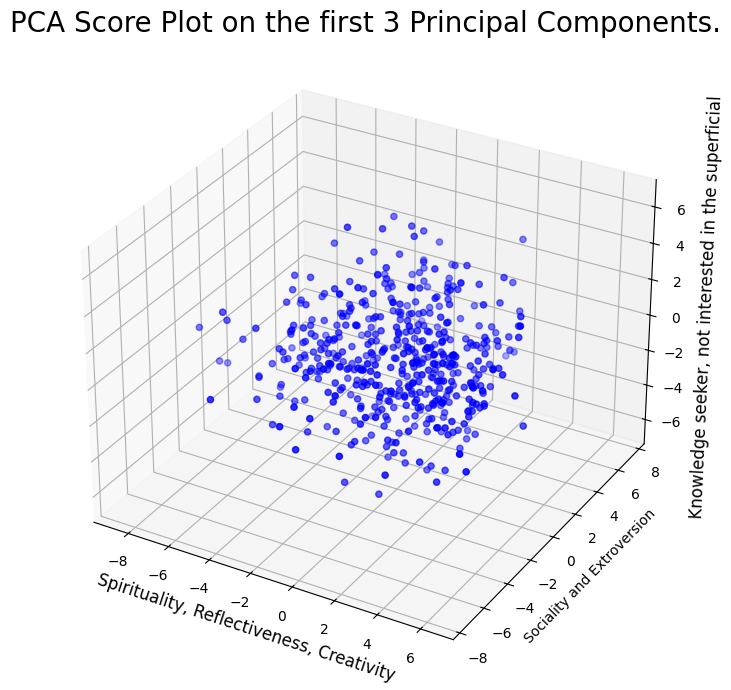

In [13]:
# Score graph

# Since we have 5 principal compoents we reduce them to 3 in order to plot the graph
# We re-apply PCA with n=3 and we obtain the first 3 PCs and transform the data in 3d.

pca_standard_3d= PCA(n_components=3)
pca_standard_3d.fit(Xstd_df)
# we now transform the dataset in the new space 
y_standard_3d=pca_standard_3d.transform(Xstd_df)


# 3D scatter plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(y_standard_3d[:,0], y_standard_3d[:,1], y_standard_3d[:,2], c='blue', marker='o',s=20)

ax.set_title("PCA Score Plot on the first 3 Principal Components.", fontsize=20)
ax.set_xlabel('Spirituality, Reflectiveness, Creativity', fontsize=12)
ax.set_ylabel('Sociality and Extroversion', fontsize=10)
ax.set_zlabel('Knowledge seeker, not interested in the superficial', fontsize=12,rotation=90)

fig.subplots_adjust(left=0.4, right=30, bottom=0.1, top=0.9)
plt.tight_layout()

plt.show()


Unfortunately in 3d the scatterplot is quite homogenious and therefore we can't easily tell that a specific class is far apart from the other individuals.

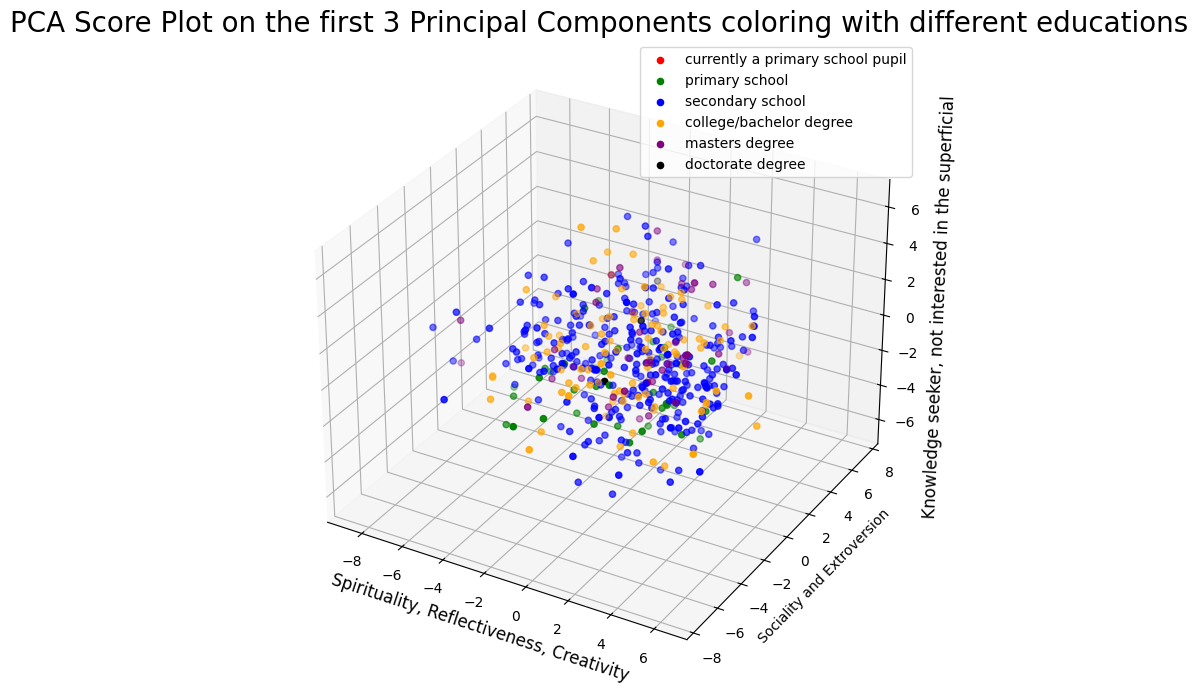

In [14]:

colors = ['red', 'green', 'blue', 'orange',"purple","black"] 
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

education=labels_dataset.loc[:,'Education']

for ll in np.unique(education):  #unique cluster labels
    ax.scatter(
        y_standard_3d[education== ll, 0],
        y_standard_3d[education == ll, 1], 
        y_standard_3d[education == ll, 2], 
        c=colors[ll-1],  # here since the education starts from 1 and ends with 6 we have to decrease by 1 
       
    )

ax.set_title("PCA Score Plot on the first 3 Principal Components coloring with different educations", fontsize=20)
ax.set_xlabel('Spirituality, Reflectiveness, Creativity', fontsize=12)
ax.set_ylabel('Sociality and Extroversion', fontsize=10)
ax.set_zlabel('Knowledge seeker, not interested in the superficial', fontsize=12,rotation=90)

fig.subplots_adjust(left=0.4, right=30, bottom=0.1, top=0.9)
plt.tight_layout()
plt.legend(labels=["currently a primary school pupil","primary school","secondary school","college/bachelor degree","masters degree","doctorate degree"])

plt.show()



Here is shown the previus plot but each point is assigned the correct label of the feaure: Education.
Since most of the people that partecipated in the study are from bachelor degree (the blue dots) we can't really make a conclusion about the 
personality of the individual based on their education given that once again the scatterplot is rather homogenious. The 3d scatter does not work well to tell aparth the data so now we use the 2D scatter plot.

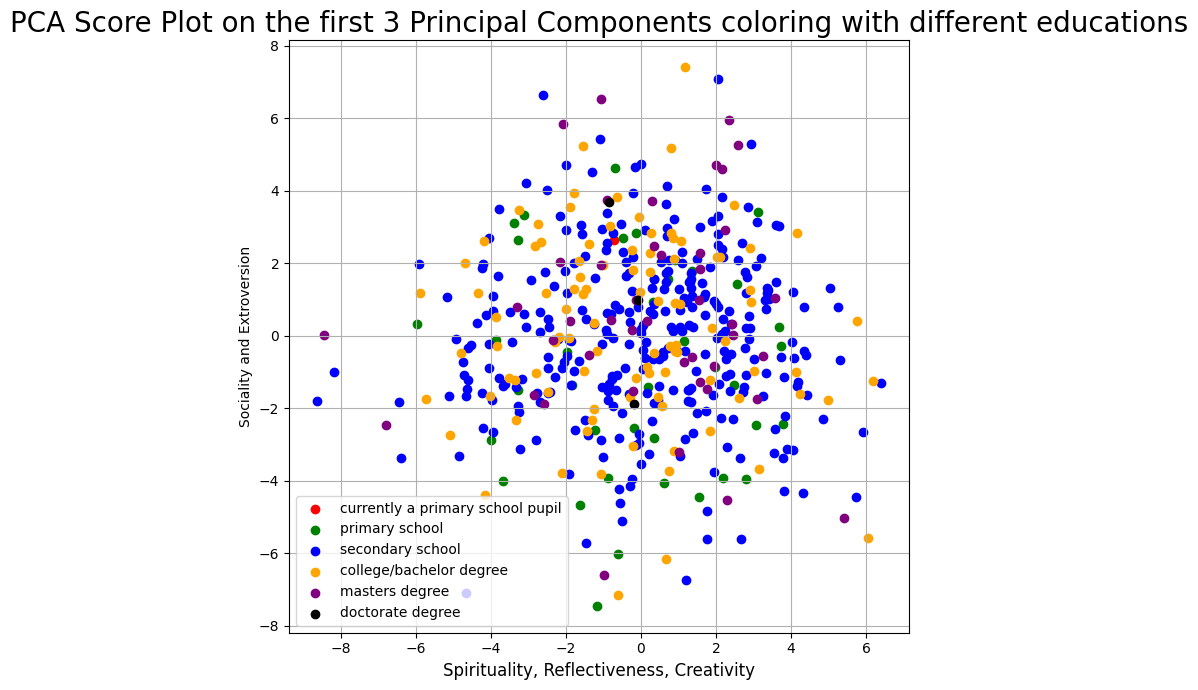

In [15]:
# 2 DIMENSIONS 
pca_standard_2d= PCA(n_components=2)
pca_standard_2d.fit(Xstd_df)

# we now transform the dataset in the new space 
y_standard_2d=pca_standard_2d.transform(Xstd_df)

colors = ['red', 'green', 'blue', 'orange',"purple","black"] 


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

education=labels_dataset.loc[:,'Education']

for ll in np.unique(education):  
    ax.scatter(
        y_standard_2d[education== ll, 0], 
        y_standard_2d[education == ll, 1], 
        
        c=colors[ll-1],  # here since the education starts from 1 and ends with 6 we have to decrease by 1 
       
    )

ax.set_title("PCA Score Plot on the first 3 Principal Components coloring with different educations", fontsize=20)
ax.set_xlabel('Spirituality, Reflectiveness, Creativity', fontsize=12)
ax.set_ylabel('Sociality and Extroversion', fontsize=10)


fig.subplots_adjust(left=0.4, right=30, bottom=0.1, top=0.9)
plt.tight_layout()
plt.legend(labels=["currently a primary school pupil","primary school","secondary school","college/bachelor degree","masters degree","doctorate degree"])

plt.grid()
plt.show()

The same conclusion as before: it's hard to reach a conclusion by just looking at the Education.

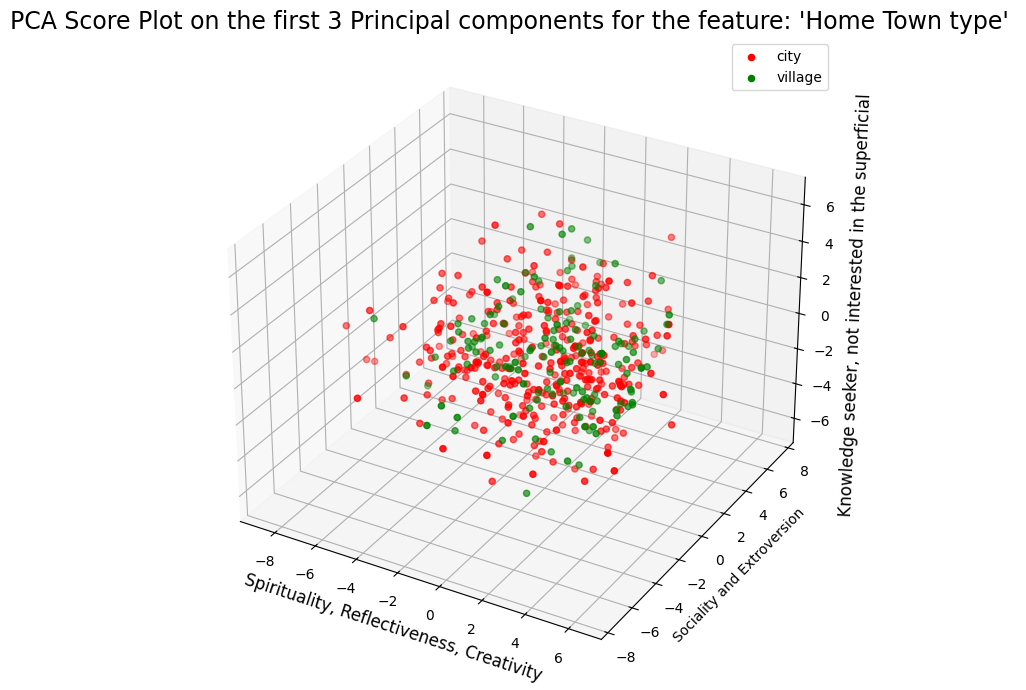

In [16]:
home_town_type=labels_dataset.loc[:,'Home Town Type']
colors = ['red', 'green'] 


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')



for ll in np.unique(home_town_type):  
    ax.scatter(
        y_standard_3d[home_town_type== ll, 0],
        y_standard_3d[home_town_type == ll, 1], 
        y_standard_3d[home_town_type == ll, 2], 
        c=colors[ll-1],  # it starts from 1 and ends with 2 we have to decrease by 1 
       
    )

ax.set_title("PCA Score Plot on the first 3 Principal components for the feature: 'Home Town type' ", fontsize=17)
ax.set_xlabel('Spirituality, Reflectiveness, Creativity', fontsize=12)
ax.set_ylabel('Sociality and Extroversion', fontsize=10)
ax.set_zlabel('Knowledge seeker, not interested in the superficial', fontsize=12,rotation=90)

fig.subplots_adjust(left=0.4, right=30, bottom=0.1, top=0.9)
plt.tight_layout()
plt.legend(labels=["city","village"])

plt.show()


We try to do the same for the feature: Home Town Type in 3D and 2D.

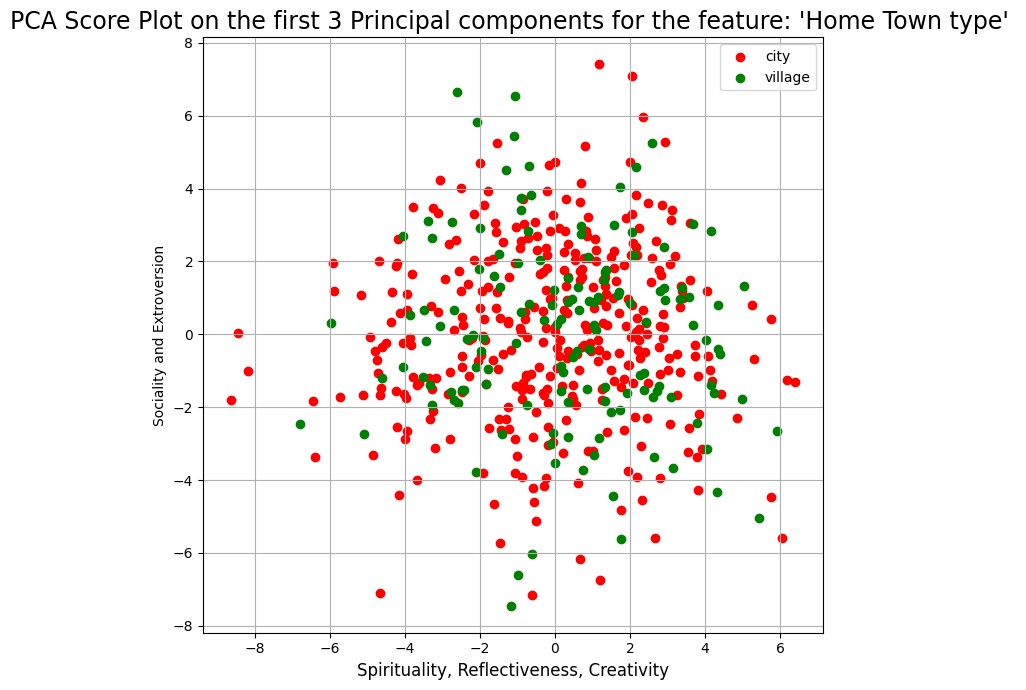

In [17]:
home_town_type=labels_dataset.loc[:,'Home Town Type']


colors = ['red', 'green'] 
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for ll in np.unique(home_town_type): 
    ax.scatter(
        y_standard_3d[home_town_type== ll, 0],
        y_standard_3d[home_town_type == ll, 1], 
         
        c=colors[ll-1],  # it starts from 1 and ends with 2 we have to decrease by 1 
       
    )
ax.set_title("PCA Score Plot on the first 3 Principal components for the feature: 'Home Town type' ", fontsize=17)
ax.set_xlabel('Spirituality, Reflectiveness, Creativity', fontsize=12)
ax.set_ylabel('Sociality and Extroversion', fontsize=10)

fig.subplots_adjust(left=0.4, right=30, bottom=0.1, top=0.9)
plt.tight_layout()
plt.grid()
plt.legend(labels=["city","village"])

plt.show()



Unfortunately it is not easy to tell aparth the different groups even in 2D for both examples chosen. There is too much overlap between the data.

## Exercise 4. $k$-Means

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **use the silohuette score for identify the best value for $k\in\{3, \ldots, 10\}$**.
2. Plot the score graphs of exercise 3.3, adding the centroids of the cluster.
3. Observing the centroids coordinates in the PC space, **give a name/interpretation to them**, exploiting the names you assigned to the PCs. **Comment and motivate your interpretations**.

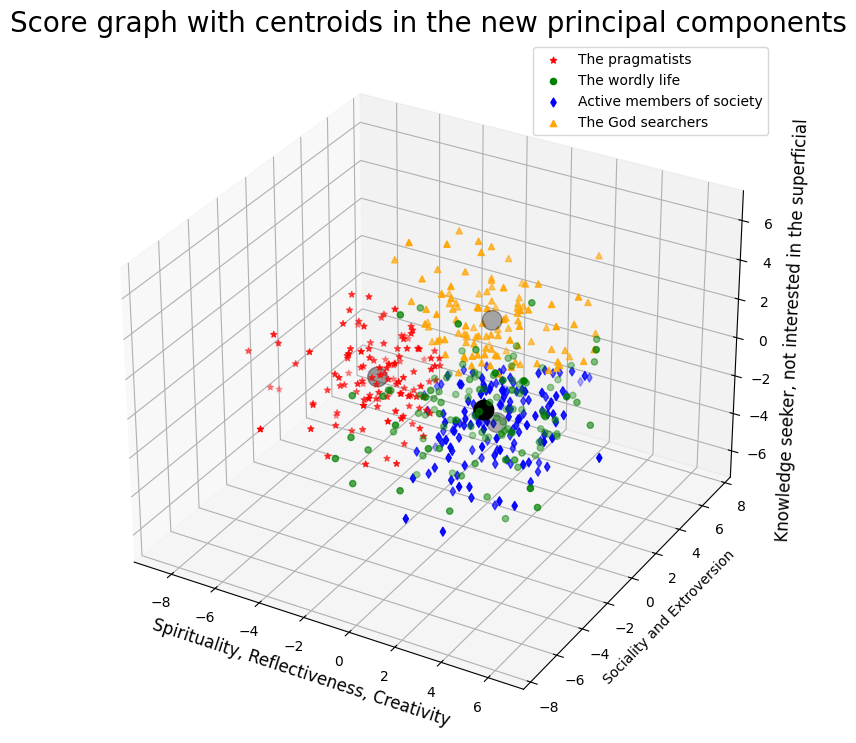

In [18]:
vector_silohuette = []

for i in range(3, 11):
    km_std = KMeans(n_clusters=i, random_state=random_seed)
    km_std.fit(y_standard_new)
    labels = km_std.labels_
    silohuette = silhouette_score(y_standard_new, labels)
    vector_silohuette.append(silohuette)

max_index = vector_silohuette.index(max(vector_silohuette))
k_best=max_index+3


km_std_best = KMeans(n_clusters=k_best, random_state=random_seed)
km_std_best.fit(y_standard_new)




#########################################################



km_std_3d = KMeans(n_clusters=k_best, random_state=random_seed)
km_std_3d.fit(y_standard_3d)


colors = ['red', 'green', 'blue', 'orange'] 
markers_dict = {0: '*', 1: 'o', 2: 'd', 3: '^'}

fig_3dscatter = plt.figure(figsize=(9, 9))
ax = fig_3dscatter.add_subplot(111, projection='3d')


for ll in np.unique(km_std_3d.labels_):  
    ax.scatter(
        y_standard_3d[km_std_3d.labels_ == ll, 0], 
        y_standard_3d[km_std_3d.labels_ == ll, 1], 
        y_standard_3d[km_std_3d.labels_ == ll, 2], 
        c=colors[ll],  
        marker=markers_dict[ll]  
    )

# centroids
ax.scatter(
    km_std_3d.cluster_centers_[:, 0], 
    km_std_3d.cluster_centers_[:, 1], 
    km_std_3d.cluster_centers_[:, 2], 
    c='black', 
    marker='o',
    s=200
)

plt.title('Score graph with centroids in the new principal components', fontsize=20)
ax.set_xlabel('Spirituality, Reflectiveness, Creativity', fontsize=12)
ax.set_ylabel('Sociality and Extroversion', fontsize=10)
ax.set_zlabel('Knowledge seeker, not interested in the superficial', fontsize=12, rotation=90)
ax.legend(labels=["The pragmatists", 
"The wordly life",
"Active members of society",
"The God searchers"])
plt.grid()
plt.show()


Comments on this plot are put later in the interpretation on the centroids.

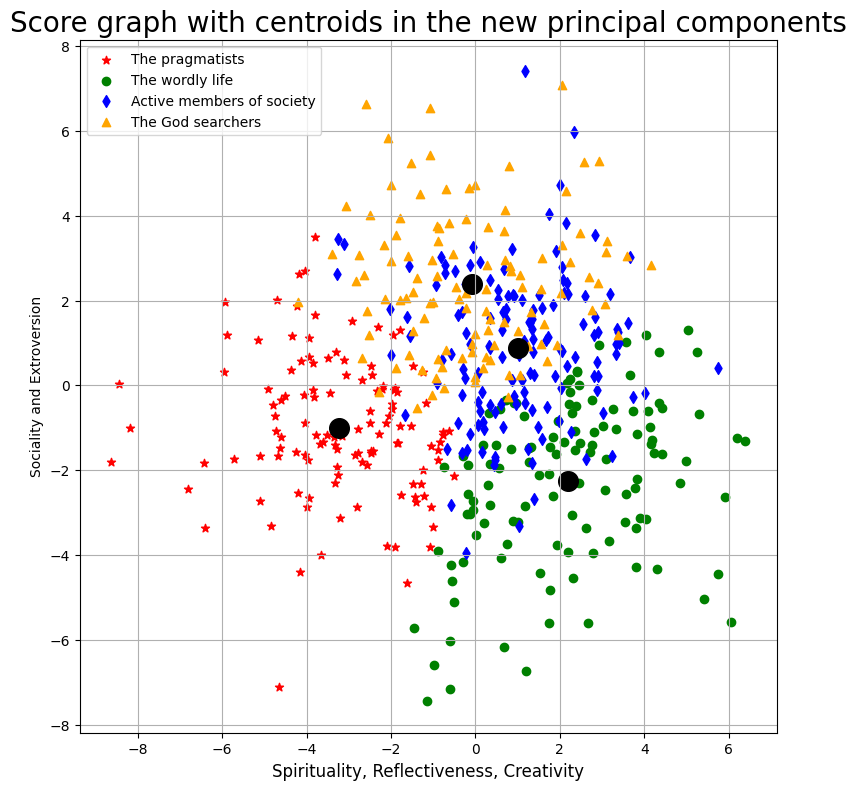

In [19]:
colors = ['red', 'green', 'blue', 'orange']  
markers_dict = {0: '*', 1: 'o', 2: 'd', 3: '^'}

fig_3dscatter = plt.figure(figsize=(9, 9))
ax = fig_3dscatter.add_subplot(111)


for ll in np.unique(km_std_3d.labels_):
    ax.scatter(
        y_standard_3d[km_std_3d.labels_ == ll, 0], 
        y_standard_3d[km_std_3d.labels_ == ll, 1], 
        
        c=colors[ll],  
        marker=markers_dict[ll] 
    )

#centroids
ax.scatter(
    km_std_3d.cluster_centers_[:, 0], 
    km_std_3d.cluster_centers_[:, 1], 
    c='black',  
    marker='o',
    s=200
)

plt.title('Score graph with centroids in the new principal components', fontsize=20)
ax.set_xlabel('Spirituality, Reflectiveness, Creativity', fontsize=12)
ax.set_ylabel('Sociality and Extroversion', fontsize=10)
ax.legend(labels=["The pragmatists", 
"The wordly life",
"Active members of society",
"The God searchers"])
plt.grid()
plt.show()


How the names in the legend are obtained is explained later, but we can already see in this plot that the "Pragmatists" group is a bit more aparth from the others and in particular there is little intersects with the "God searchers" due to the different style of life. Instead "The active members of society" are halfway between the other two.

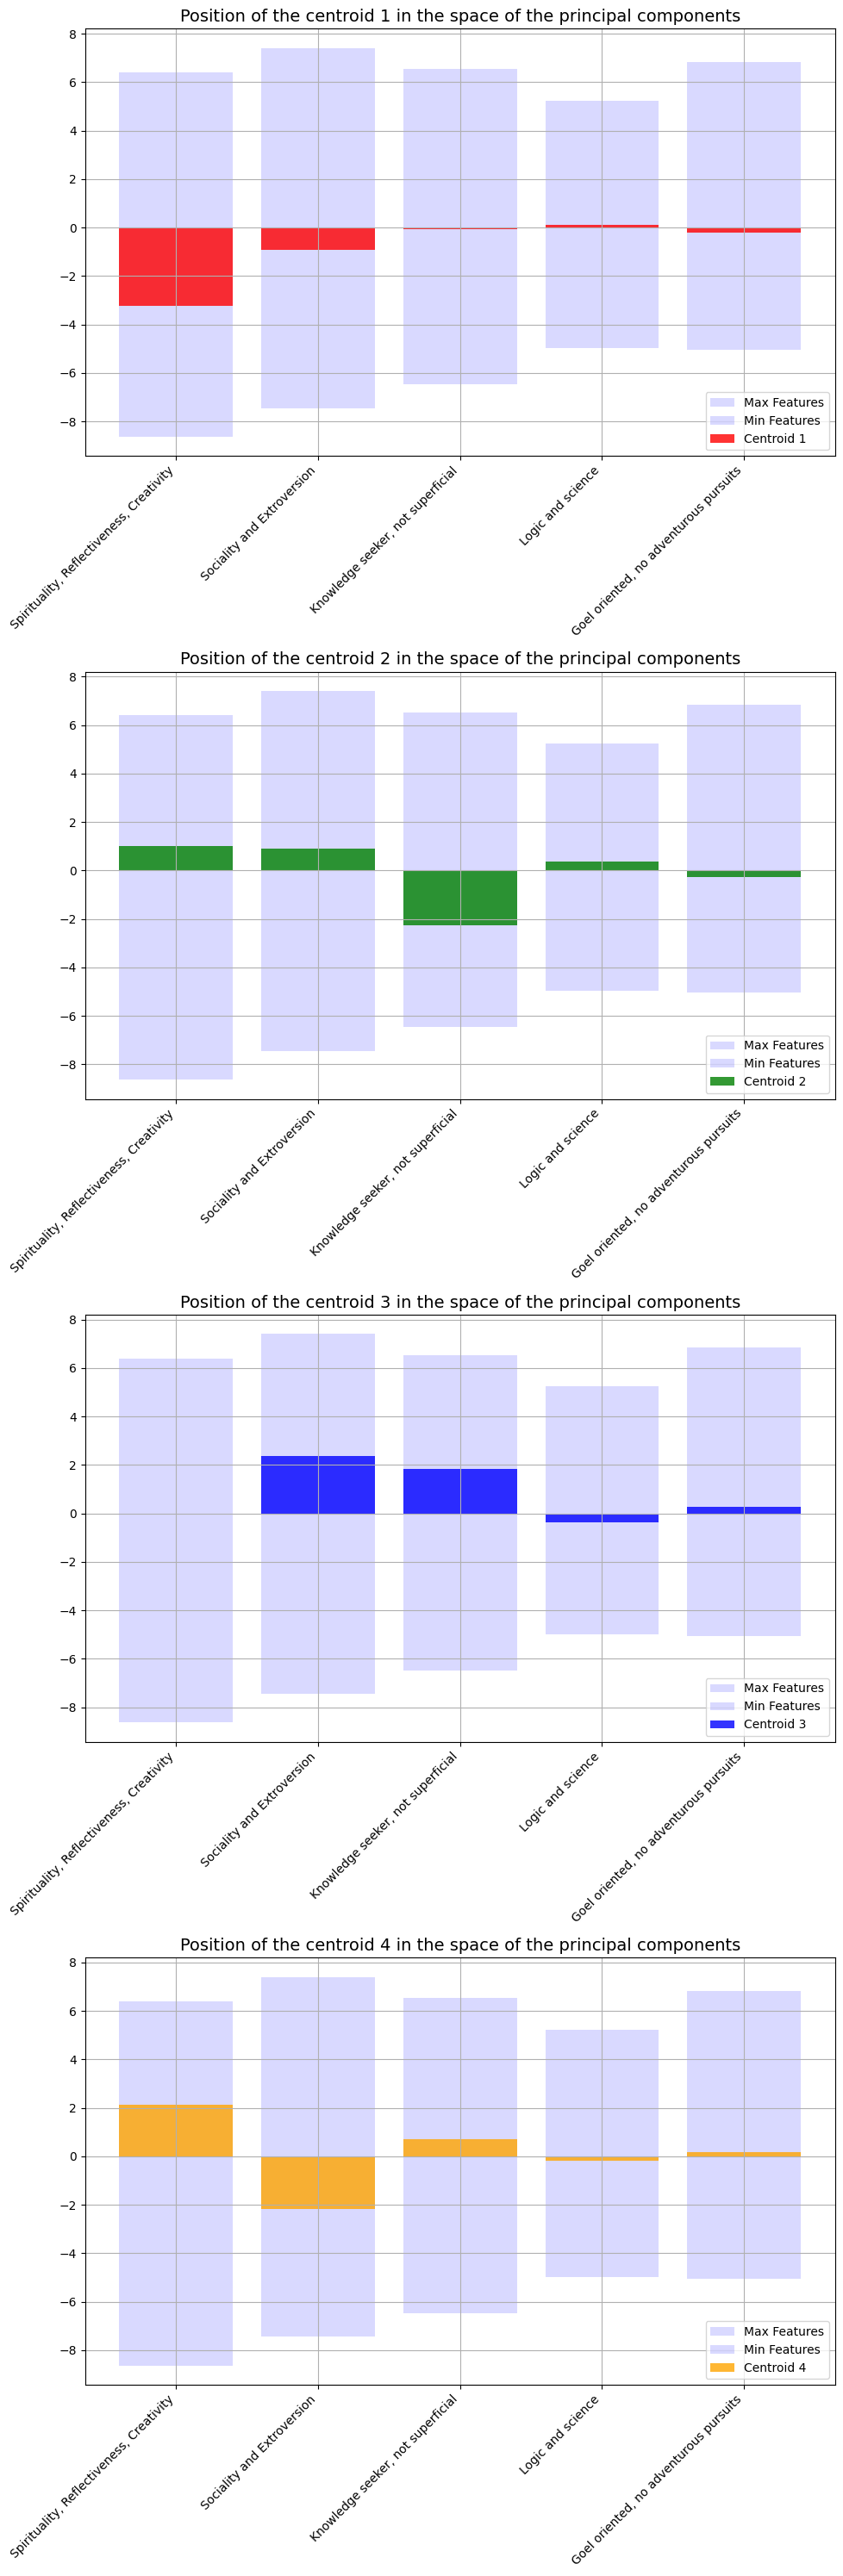

In [20]:
fig_bar, ax_bar = plt.subplots(4, 1, figsize=(10, 30)) 

color_used= ['red', 'green', 'blue', 'orange']


for ii in range(4):
    
    ax_bar[ii].bar(
        np.arange(km_std_best.cluster_centers_.shape[1]), 
        y_standard_new.max(axis=0), 
        color='blue', 
        alpha=0.15, 
        label='Max Features'
    )
  
    ax_bar[ii].bar(
        np.arange(km_std_best.cluster_centers_.shape[1]), 
        y_standard_new.min(axis=0), 
        color='blue', 
        alpha=0.15, 
        label='Min Features'
    )
    
    ax_bar[ii].bar(
        np.arange(km_std_best.cluster_centers_.shape[1]), 
        km_std_best.cluster_centers_[ii, :], 
        color=color_used[ii], 
        alpha=0.8, 
        label=f'Centroid {ii+1}'
    )
   
    ax_bar[ii].set_xticks(ticks=np.arange(km_std_best.cluster_centers_.shape[1]))
    ax_bar[ii].set_xticklabels(
        labels=[
            'Spirituality, Reflectiveness, Creativity', 
            'Sociality and Extroversion', 
            "Knowledge seeker, not superficial",
            'Logic and science',
            'Goel oriented, no adventurous pursuits'
        ], 
        rotation=45, 
        ha='right'  
    )

    ax_bar[ii].grid(visible=True, which='both')
    ax_bar[ii].set_title(f'Position of the centroid {ii+1} in the space of the principal components', fontsize=14)
    ax_bar[ii].legend()

plt.tight_layout()
plt.show()


Interpretation of centroid 1:
Since this group of people has low spirituality, are not particularly reflective or creative, introverts and are a bit interested in science and logic. They can be descrived as: 
The pragmatists. 
They are more focused on more concrete parts of life.

Interpretation of centroid 2:

since it positive correlates with all the features exept the "knowledge seeker, not superficial" we can call this cluster as the: The socialite life (vita mondana).

Interpretation of centroid 3:

Active members of society: people that are socially active in the community in college given that they are interested in learning and interact with others.

Interpretation of centroid 4:

The God searchers, they are people that tend to isolate themselves to appreaciate the beauty in the world, in the human arts but not with a focus on the scientific knowledge.

Comments on the 3D and 2D score graphs:
In the score graph we can see that centroids 1 and 4 are quite far apart and indeed it makes sense given that the interpretation we have 
given are quite different from one another.
Instead, centroids 2 and 3 are much closer and their interpretation of someone that is socially active, a shared trait that the two have in common.

Summary:

Centroid 1 = The pragmatists

Centroid 2 = The socialite life

Centroid 3 = Active members of society

Centroid 4 = The God searchers

## Exercise 5. Cluster Evaluations

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), perform an **external evaluation** of the clustering obtained at exercise 4.1 with respect to one or more labels in the list _labels_. **Comment the results, comparing the evaluation with the interpretation you gave at exercise 4.3**. 
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. **Comment the results**. 

[2 3 4 5] [10 82 25  6]
[1 2 3 4 5] [ 1 11 88 21  9]


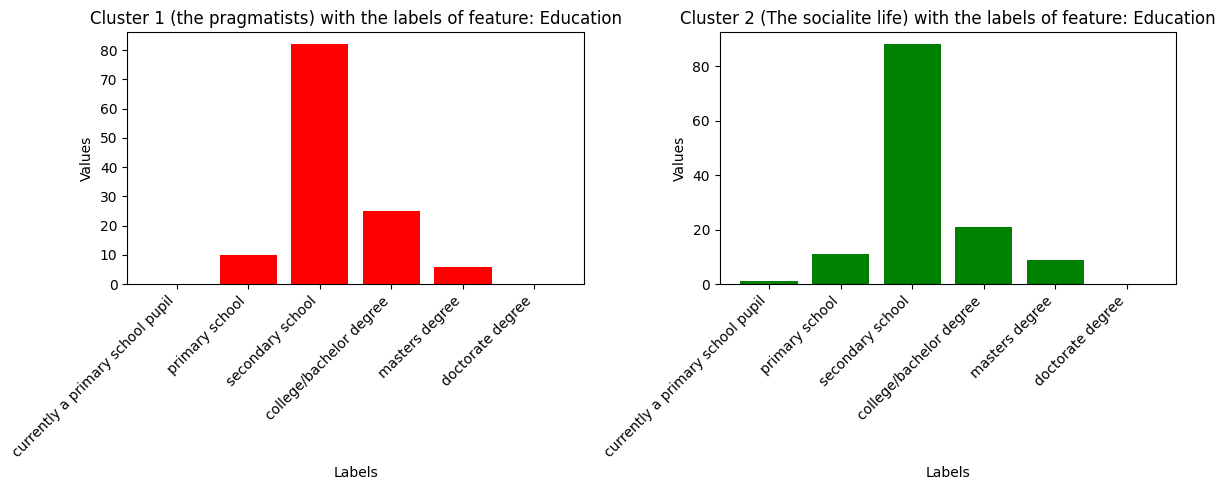

[2 3 4 5 6] [ 4 63 31 15  2]
[2 3 4 5 6] [14 78 21 13  1]


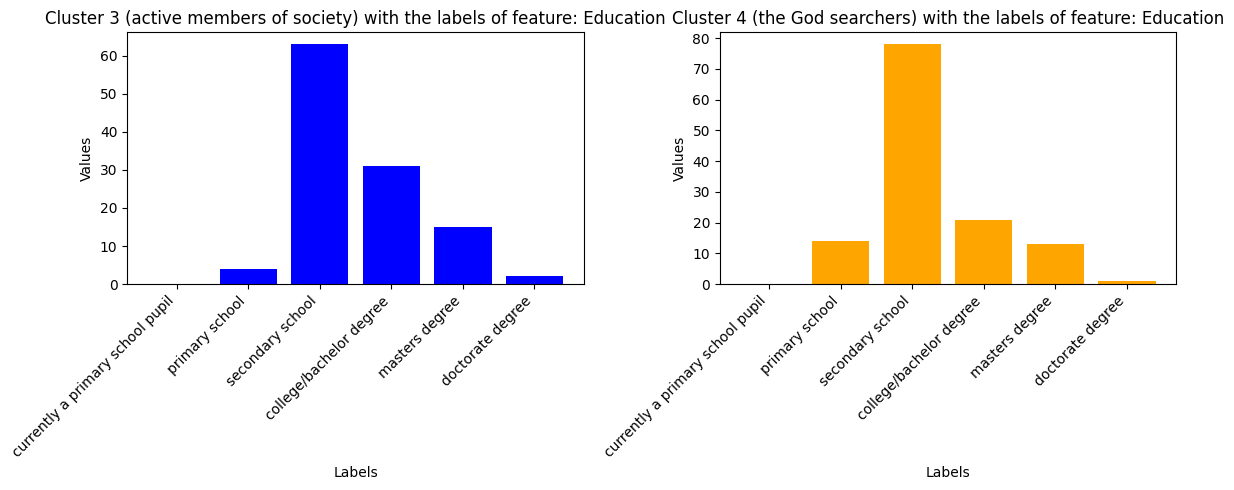

In [21]:
# External evaluation:

prediction=km_std_best.labels_

index_prediction_0 = [prediction[i] == 0 for i in range(len(prediction))] 
index_prediction_1 = [prediction[i] == 1 for i in range(len(prediction))] 
# I now extract the rows of the labels for the feature Education
#cluster 1:
labels_cluster_1=labels_dataset.loc[index_prediction_0,"Education"]
#cluster 2:
labels_cluster_2=labels_dataset.loc[index_prediction_1,"Education"]


unique_values_cluster_1, counts_cluster_1 = np.unique(labels_cluster_1, return_counts=True)

print(unique_values_cluster_1,counts_cluster_1)

# here cluster 1 does not have any rows with labels 1 and 6 so I manually put 0s, because it would give me an error
labels_cluster_1_value_1=0
labels_cluster_1_value_2=counts_cluster_1[0]
labels_cluster_1_value_3=counts_cluster_1[1]
labels_cluster_1_value_4=counts_cluster_1[2]
labels_cluster_1_value_5=counts_cluster_1[3]
labels_cluster_1_value_6=0


unique_values_cluster_2, counts_cluster_2 = np.unique(labels_cluster_2, return_counts=True)
print(unique_values_cluster_2,counts_cluster_2)
# here I do the same thing but only value 6 is missing
labels_cluster_2_value_1=counts_cluster_2[0]
labels_cluster_2_value_2=counts_cluster_2[1]
labels_cluster_2_value_3=counts_cluster_2[2]
labels_cluster_2_value_4=counts_cluster_2[3]
labels_cluster_2_value_5=counts_cluster_2[4]
labels_cluster_2_value_6=0



labels = ["currently a primary school pupil",
    "primary school",
    "secondary school",
    "college/bachelor degree",
    "masters degree",
    "doctorate degree"]

values_cluster_1 = [labels_cluster_1_value_1, labels_cluster_1_value_2,labels_cluster_1_value_3,labels_cluster_1_value_4,labels_cluster_1_value_5,labels_cluster_1_value_6] 
values_cluster_2 = [labels_cluster_2_value_1, labels_cluster_2_value_2,labels_cluster_2_value_3,labels_cluster_2_value_4,labels_cluster_2_value_5,labels_cluster_2_value_6] 

#print("Values of the first bar plot:")
#print(int(values_cluster_1[0]), int(values_cluster_1[1]))
#print("Values of the second bar plot:")
#print(int(values_cluster_2[0]), int(values_cluster_2[1]))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns


axes[0].bar(labels, values_cluster_1, color='red')
axes[0].set_xlabel('Labels')
axes[0].set_ylabel('Values')
axes[0].set_title('Cluster 1 (the pragmatists) with the labels of feature: Education')
axes[0].set_xticks(range(len(labels)))  # Set the ticks to match the labels
axes[0].set_xticklabels(labels, rotation=45, ha='right')



axes[1].bar(labels, values_cluster_2, color='green')
axes[1].set_xlabel('Labels')
axes[1].set_ylabel('Values')
axes[1].set_title('Cluster 2 (The socialite life) with the labels of feature: Education')
axes[1].set_xticks(range(len(labels)))  # Set the ticks to match the labels
axes[1].set_xticklabels(labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()




index_prediction_2 = [prediction[i] == 2 for i in range(len(prediction))] 
index_prediction_3 = [prediction[i] == 3 for i in range(len(prediction))] 


#cluster 3:
labels_cluster_3=labels_dataset.loc[index_prediction_2,"Education"]
#cluster 2:
labels_cluster_4=labels_dataset.loc[index_prediction_3,"Education"]


unique_values_cluster_3, counts_cluster_3 = np.unique(labels_cluster_3, return_counts=True)

print(unique_values_cluster_3,counts_cluster_3)

# here cluster 3 does not have 1s so I manually put 0s, because it would give me an error
labels_cluster_1_value_1=0
labels_cluster_1_value_2=counts_cluster_3[0]
labels_cluster_1_value_3=counts_cluster_3[1]
labels_cluster_1_value_4=counts_cluster_3[2]
labels_cluster_1_value_5=counts_cluster_3[3]
labels_cluster_1_value_6=counts_cluster_3[4]


unique_values_cluster_4, counts_cluster_4 = np.unique(labels_cluster_4, return_counts=True)
print(unique_values_cluster_4, counts_cluster_4)

# here I do the same thing here 

labels_cluster_2_value_1=0
labels_cluster_2_value_2=counts_cluster_4[0]
labels_cluster_2_value_3=counts_cluster_4[1]
labels_cluster_2_value_4=counts_cluster_4[2]
labels_cluster_2_value_5=counts_cluster_4[3]
labels_cluster_2_value_6=counts_cluster_4[4]



labels = ["currently a primary school pupil",
    "primary school",
    "secondary school",
    "college/bachelor degree",
    "masters degree",
    "doctorate degree"]

values_cluster_1 = [labels_cluster_1_value_1, labels_cluster_1_value_2,labels_cluster_1_value_3,labels_cluster_1_value_4,labels_cluster_1_value_5,labels_cluster_1_value_6] 
values_cluster_2 = [labels_cluster_2_value_1, labels_cluster_2_value_2,labels_cluster_2_value_3,labels_cluster_2_value_4,labels_cluster_2_value_5,labels_cluster_2_value_6] 
#print("Values of the first bar plot:")
#print(int(values_cluster_1[0]), int(values_cluster_1[1]))
#print("Values of the second bar plot:")
#print(int(values_cluster_2[0]), int(values_cluster_2[1]))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns


axes[0].bar(labels, values_cluster_1, color='blue')
axes[0].set_xlabel('Labels')
axes[0].set_ylabel('Values')
axes[0].set_title('Cluster 3 (active members of society) with the labels of feature: Education')
axes[0].set_xticks(range(len(labels)))  # Set the ticks to match the labels
axes[0].set_xticklabels(labels, rotation=45, ha='right')

axes[1].bar(labels, values_cluster_2, color='orange')
axes[1].set_xlabel('Labels')
axes[1].set_ylabel('Values')
axes[1].set_title('Cluster 4 (the God searchers) with the labels of feature: Education')
axes[1].set_xticks(range(len(labels)))  # Set the ticks to match the labels
axes[1].set_xticklabels(labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()





Here I mainteined the colors used in the score graph of each cluster. It's time for the external valuation to see if the k-means would in some way group people that have the same level of education. The results throughout the different centroids seem pretty similar to one another, maybe the only thing that stands out from these graphs is that cluster 3 has way more people with the label: college/bachelor degree. This fact is plausible with the interpretation I have given to this cluster, that is: a group of people that tend to socialize a lot and are interestrested in learning new knowledge, rejecting the superficial. Features very common in someone that attends univerity.

Values of the first bar plot:
95 28
Values of the second bar plot:
95 35


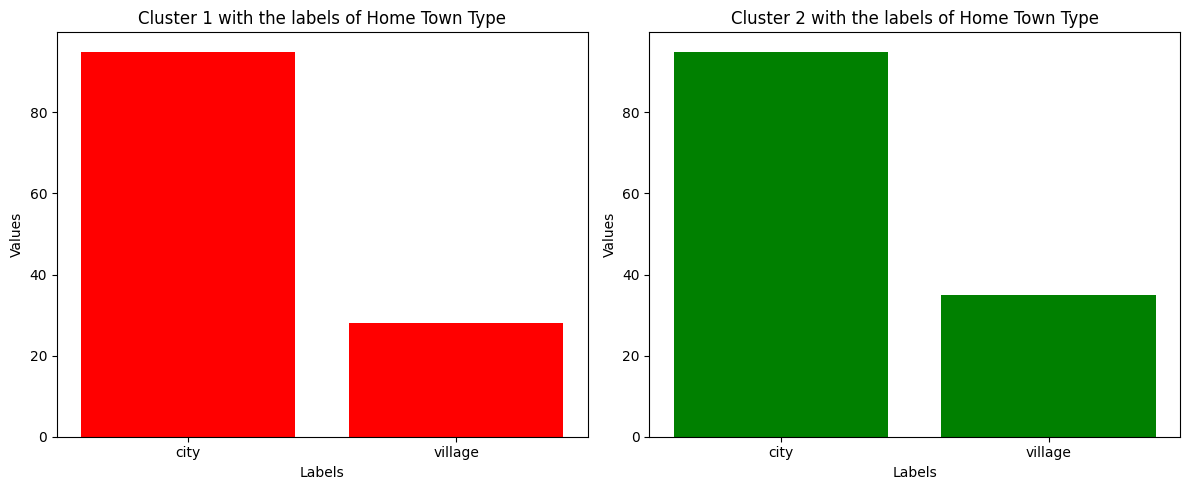

Values of the third bar plot:
80 35
Values of the forth bar plot:
85 42


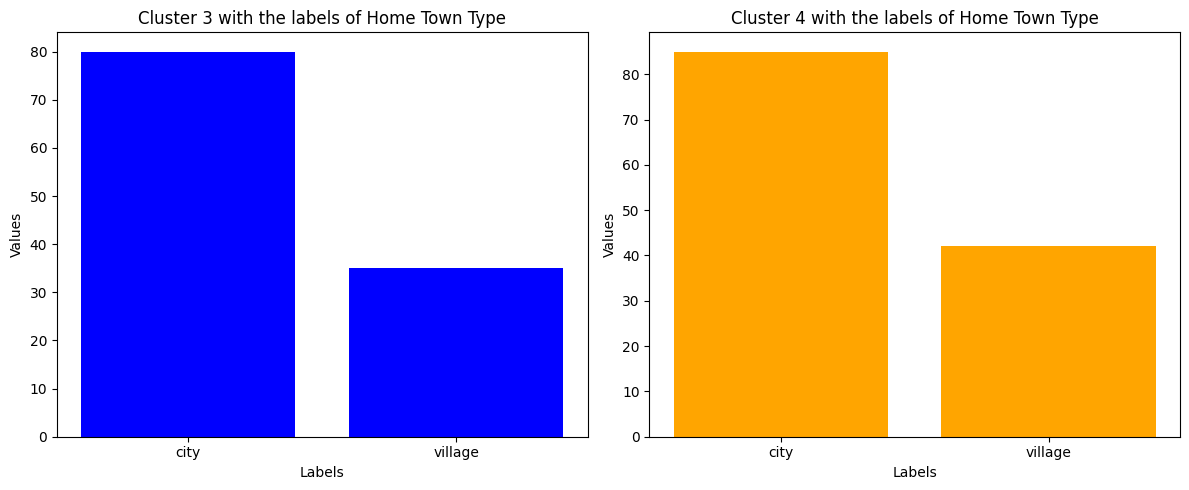

In [22]:
# External evaluation:


prediction=km_std_best.labels_

index_prediction_0 = [prediction[i] == 0 for i in range(len(prediction))] 
index_prediction_1 = [prediction[i] == 1 for i in range(len(prediction))] 


# I now extract the rows of the labels for the feature Home Town Type
#cluster 1:
labels_cluster_1=labels_dataset.loc[index_prediction_0,"Home Town Type"]

#cluster 2:
labels_cluster_2=labels_dataset.loc[index_prediction_1,"Home Town Type"]


unique_values_cluster_1, counts_cluster_1 = np.unique(labels_cluster_1, return_counts=True)
unique_values_cluster_2, counts_cluster_2 = np.unique(labels_cluster_2, return_counts=True)

labels_cluster_1_value_1=counts_cluster_1[0]
labels_cluster_1_value_2=counts_cluster_1[1]

labels_cluster_2_value_1=counts_cluster_2[0]
labels_cluster_2_value_2=counts_cluster_2[1]

labels = ['city', 'village']
values_cluster_1 = [labels_cluster_1_value_1, labels_cluster_1_value_2] 
values_cluster_2 = [labels_cluster_2_value_1, labels_cluster_2_value_2] 
print("Values of the first bar plot:")
print(int(values_cluster_1[0]), int(values_cluster_1[1]))
print("Values of the second bar plot:")
print(int(values_cluster_2[0]), int(values_cluster_2[1]))
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First bar plot
axes[0].bar(labels, values_cluster_1, color='red')
axes[0].set_xlabel('Labels')
axes[0].set_ylabel('Values')
axes[0].set_title('Cluster 1 with the labels of Home Town Type')

# Second bar plot
axes[1].bar(labels, values_cluster_2, color='green')
axes[1].set_xlabel('Labels')
axes[1].set_ylabel('Values')
axes[1].set_title('Cluster 2 with the labels of Home Town Type')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

index_prediction_2 = [prediction[i] == 2 for i in range(len(prediction))] 
index_prediction_3 = [prediction[i] == 3 for i in range(len(prediction))] 

# I now extract the rows of the labels for the feature Home Town Type
#cluster 3:
labels_cluster_3=labels_dataset.loc[index_prediction_2,"Home Town Type"]
#cluster 4:
labels_cluster_4=labels_dataset.loc[index_prediction_3,"Home Town Type"]


unique_values_cluster_3, counts_cluster_3 = np.unique(labels_cluster_3, return_counts=True)
unique_values_cluster_4, counts_cluster_4 = np.unique(labels_cluster_4, return_counts=True)

labels_cluster_3_value_1=counts_cluster_3[0]
labels_cluster_3_value_2=counts_cluster_3[1]

labels_cluster_4_value_1=counts_cluster_4[0]
labels_cluster_4_value_2=counts_cluster_4[1]

labels = ['city', 'village']
values_cluster_3 = [labels_cluster_3_value_1, labels_cluster_3_value_2] 
values_cluster_4 = [labels_cluster_4_value_1, labels_cluster_4_value_2] 
print("Values of the third bar plot:")
print(int(values_cluster_3[0]), int(values_cluster_3[1]))
print("Values of the forth bar plot:")
print(int(values_cluster_4[0]), int(values_cluster_4[1]))
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

# First bar 
axes[0].bar(labels, values_cluster_3, color='blue')
axes[0].set_xlabel('Labels')
axes[0].set_ylabel('Values')
axes[0].set_title('Cluster 3 with the labels of Home Town Type')

# second bar
axes[1].bar(labels, values_cluster_4, color='orange')
axes[1].set_xlabel('Labels')
axes[1].set_ylabel('Values')
axes[1].set_title('Cluster 4 with the labels of Home Town Type')

plt.tight_layout()
plt.show()


The Home Town Type seems to be evenly distributed among all 4 centroid, simply the majority of the people that respondend to the questions are from cities and we can't differentiate the personality using this feature since the proportion is pretty much equal in all the graphs.

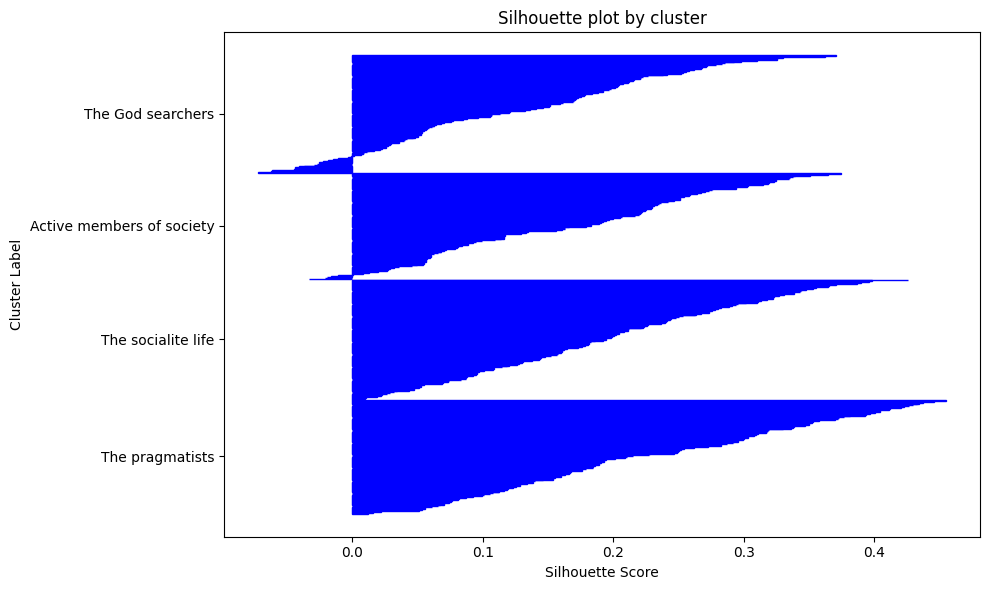

Cluster_Label
0    0.231329
1    0.194365
2    0.165138
3    0.121328
Name: Silhouette_Score, dtype: float64
Overall the silhouette score is 0.1780213843167558


In [23]:
# Internal evalutation:

sample_silhouette_values = silhouette_samples(y_standard_new, prediction)
print

results = pd.DataFrame({
    'Sample_Index': np.arange(len(sample_silhouette_values)),
    'Cluster_Label': prediction,
    'Silhouette_Score': sample_silhouette_values
})


results_sorted = results.sort_values(by=['Cluster_Label', 'Silhouette_Score'])

# Prepare data for plotting
cluster_labels = results_sorted['Cluster_Label'].unique()
y_ticks = []
y_lower = 0

# Create the silhouette plot
plt.figure(figsize=(10, 6))
for cluster in cluster_labels:
    # Get the silhouette scores for this cluster
    cluster_scores = results_sorted[results_sorted['Cluster_Label'] == cluster]['Silhouette_Score']
    cluster_size = len(cluster_scores)
    
    # Plot the scores as bars
    plt.barh(
        range(y_lower, y_lower + cluster_size),
        cluster_scores,
        edgecolor='blue',
        label=f"Cluster {cluster}"
    )
    
    # Update y-axis tick positions
    y_ticks.append(y_lower + 0.5 * cluster_size)
    y_lower += cluster_size


nemes_cluster=["The pragmatists",
"The socialite life",
"Active members of society",
"The God searchers"]
plt.yticks(y_ticks, [f"{i}" for i in nemes_cluster])
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster Label")
plt.title("Silhouette plot by cluster")

plt.tight_layout()
plt.show()

mean_silhouette_per_cluster = results.groupby('Cluster_Label')['Silhouette_Score'].mean()
print(mean_silhouette_per_cluster)

print(f"Overall the silhouette score is {vector_silohuette[1]}")


The silhouette score for each cluster is positive but is not really high, this was an expected results since it was already pointed out that the cloud of points are not easily distinguiscible in a simple way so using the k-means there is some potential overlap between clusters. It's particularly evident in the previous 3D picture but here lower silhouette scores are achived for the two clusters that most overlap.

It's now time to use Xmm_df and compare it to Xstd_df

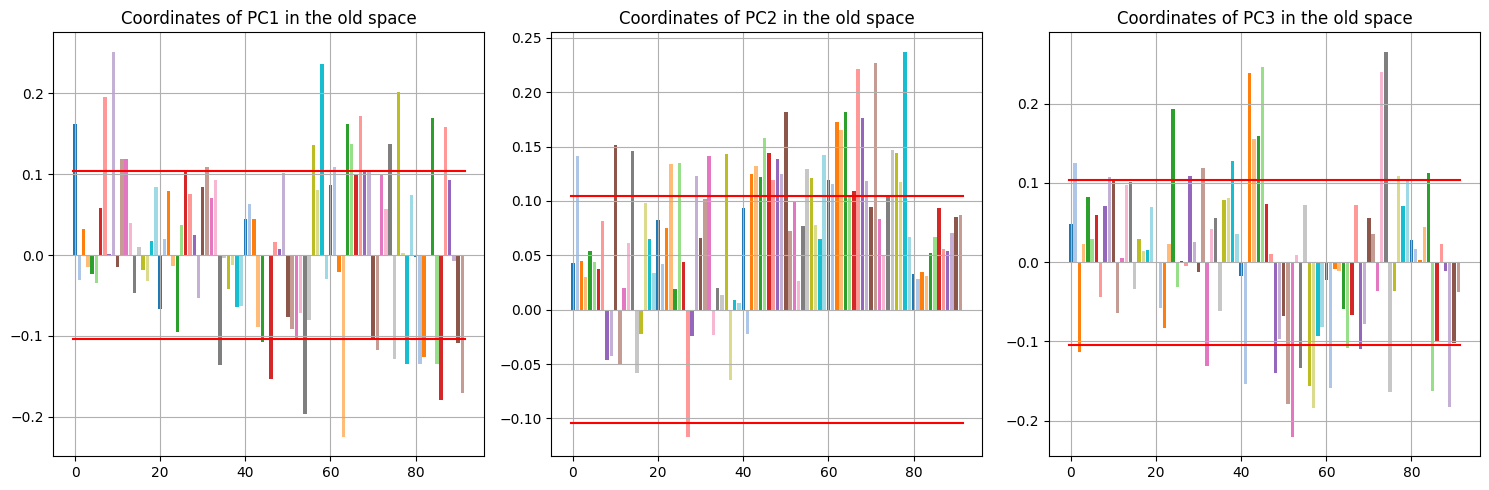

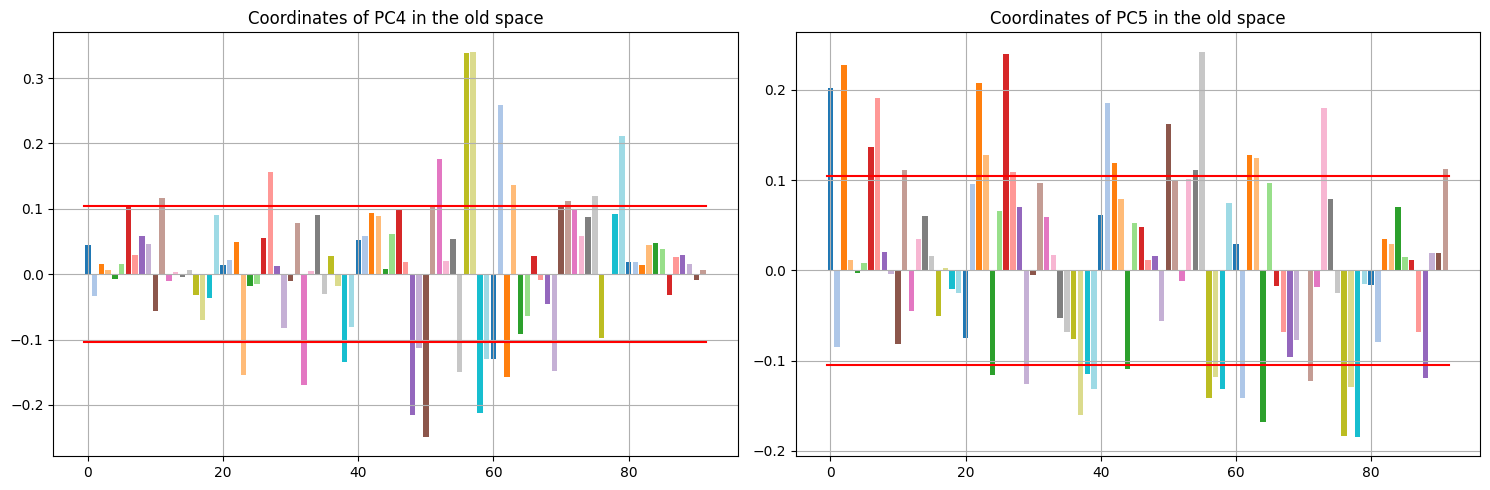

In [24]:
# First the data standardized
pca_minmax_reduction= PCA(n_components=5)
pca_minmax_reduction.fit(Xmm_df)

# we now transform the dataset in the new space 
y_minmax_new=pca_minmax_reduction.transform(Xmm_df)

eps = np.sqrt(1 / Xmm_df.shape[1])

colors = cm.tab20.colors
tab20 = cm.tab20.colors


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].bar(np.arange(Xmm_df.shape[1]), pca_minmax_reduction.components_[0, :], color=tab20[:Xmm_df.shape[1]])
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
ax[0].plot([-0.5, Xmm_df.shape[1] - 0.5], [eps, eps], 'red')
ax[0].plot([-0.5, Xmm_df.shape[1] - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------
ax[0].set_title('Coordinates of PC1 in the old space')
ax[0].grid(visible=True, which='both')
ax[1].bar(np.arange(Xmm_df.shape[1]), pca_minmax_reduction.components_[1, :], color=tab20[:Xmm_df.shape[1]])
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
ax[1].plot([-0.5, Xmm_df.shape[1] - 0.5], [eps, eps], 'red')
ax[1].plot([-0.5, Xmm_df.shape[1] - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------

ax[1].set_title('Coordinates of PC2 in the old space')
ax[1].grid(visible=True, which='both')
ax[2].bar(np.arange(Xmm_df.shape[1]), pca_minmax_reduction.components_[2, :], color=tab20[:Xmm_df.shape[1]])
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
ax[2].plot([-0.5, Xmm_df.shape[1] - 0.5], [eps, eps], 'red')
ax[2].plot([-0.5, Xmm_df.shape[1] - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------

ax[2].set_title('Coordinates of PC3 in the old space')
ax[2].grid(visible=True, which='both')
plt.tight_layout()


# First 3 Principal components and now the remaining 2:


fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(np.arange(Xmm_df.shape[1]), pca_minmax_reduction.components_[3, :], color=tab20[:Xmm_df.shape[1]])
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
ax[0].plot([-0.5, Xmm_df.shape[1] - 0.5], [eps, eps], 'red')
ax[0].plot([-0.5, Xmm_df.shape[1] - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------
ax[0].set_title('Coordinates of PC4 in the old space')
ax[0].grid(visible=True, which='both')
ax[1].bar(np.arange(Xmm_df.shape[1]), pca_minmax_reduction.components_[4, :], color=tab20[:Xmm_df.shape[1]])
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
ax[1].plot([-0.5, Xmm_df.shape[1] - 0.5], [eps, eps], 'red')
ax[1].plot([-0.5, Xmm_df.shape[1] - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------

ax[1].set_title('Coordinates of PC5 in the old space')
ax[1].grid(visible=True, which='both')

plt.tight_layout()
np.set_printoptions(threshold=np.inf)

In [25]:
these_features = np.array(these_features) # it gives some strange error without transforming it this way 


# Features relevant captured by the first principal component
PC1_minmax=pca_minmax_reduction.components_[0, :]
mask=(PC1_minmax>=eps) | (PC1_minmax<=-eps) # all the features relevant


mask_positive_features=(PC1_minmax>=eps) # the positive ones
mask_negative_features=(PC1_minmax<=-eps) # the negative ones


PC1_minmax_pos=these_features[mask_positive_features]
PC1_minmax_neg=these_features[mask_negative_features]

PC1_minmax=these_features[mask]

In [26]:
print("PC1_minmax_pos")
print(PC1_minmax_pos)
print("PC1_std_pos")
print(PC1_std_pos)
print()
print("PC1_minmax_neg")
print(PC1_minmax_neg)
print("PC1_std_neg")
print(PC1_std_neg)


PC1_minmax_pos
['God' 'Writing notes' 'Life struggles' 'Decision making' 'Empathy'
 'Final judgement' 'Giving' 'Biology' 'Reading' 'Medicine'
 'Art exhibitions' 'Religion' 'Dancing' 'Writing' 'Shopping' 'Theatre'
 'Romantic' 'Fantasy/Fairy tales']
PC1_std_pos
['God' 'Writing notes' 'Life struggles' 'Decision making' 'Empathy'
 'Mood swings' 'Biology' 'Reading' 'Art exhibitions' 'Religion' 'Dancing'
 'Gardening' 'Shopping' 'Theatre' 'Romantic' 'Fantasy/Fairy tales']

PC1_minmax_neg
['Criminal damage' 'Entertainment spending' 'Spending on gadgets' 'PC'
 'Cars' 'Active sport' 'Science and technology' 'Adrenaline sports'
 'Horror' 'Thriller' 'Sci-fi' 'War' 'Western' 'Action']
PC1_std_neg
['Cheating in school' 'Branded clothing' 'Entertainment spending'
 'Spending on gadgets' 'Physics' 'Internet' 'PC' 'Cars' 'Active sport'
 'Science and technology' 'Adrenaline sports' 'Horror' 'Thriller' 'Sci-fi'
 'War' 'Western' 'Action']


Since the differences between the features selected for PC1 with the dataset Xstd_df and Xmm_df are minimal we can give the same interpretation we did before:

PC1_minmax = Spirituality, Reflectiveness, Creativity.

In [27]:
# Features relevant captured by the second principal component
PC2_minmax=pca_minmax_reduction.components_[1, :]
mask=(PC2_minmax>=eps) | (PC2_minmax<=-eps) # all the features relevant


mask_positive_features=(PC2_minmax>=eps) # the positive ones
mask_negative_features=(PC2_minmax<=-eps) # the negative ones


PC2_minmax_pos=these_features[mask_positive_features]
PC2_minmax_neg=these_features[mask_negative_features]
PC2_minmax=these_features[mask]

In [28]:
print("PC2_minmax_pos")
print(PC2_minmax_pos)
print("PC2_std_pos")
print(PC2_std_pos)
print()
print("PC2_minmax_neg")
print(PC2_minmax_neg)
print("PC2_std_neg")
print(PC2_std_neg)

PC2_minmax_pos
['Number of friends' 'Socializing' 'Knowing the right people'
 'Daily events' 'Charity' 'New environment' 'Elections' 'Energy levels'
 'Shopping centres' 'Branded clothing' 'Entertainment spending'
 'Spending on looks' 'Spending on gadgets' 'Spending on healthy eating'
 'History' 'Psychology' 'Politics' 'Economy Management' 'Biology'
 'Geography' 'Foreign languages' 'Medicine' 'Law' 'Cars' 'Art exhibitions'
 'Religion' 'Countryside, outdoors' 'Dancing' 'Musical instruments'
 'Writing' 'Active sport' 'Shopping' 'Science and technology' 'Theatre'
 'Fun with friends' 'Adrenaline sports']
PC2_std_pos
['Number of friends' 'Personality' 'Socializing' 'Appearence and gestures'
 'Knowing the right people' 'Assertiveness' 'Daily events' 'Charity'
 'New environment' 'Giving' 'Energy levels' 'Healthy eating'
 'Shopping centres' 'Branded clothing' 'Entertainment spending'
 'Spending on looks' 'Spending on gadgets' 'Spending on healthy eating'
 'History' 'Psychology' 'Politics' 'Econ

Since this component is basically equal to the PC2 found with Xstd_df it will be given the same name.

PC2_minmax = Sociality and Extroversion

In [29]:
# Features relevant captured by the third principal component:
PC3_minmax=pca_minmax_reduction.components_[2, :]
mask=(PC3_minmax>=eps) | (PC3_minmax<=-eps) # all the features relevant


mask_positive_features=(PC3_minmax>=eps) # the positive ones
mask_negative_features=(PC3_minmax<=-eps) # the negative ones


PC3_minmax_pos=these_features[mask_positive_features]
PC3_minmax_neg=these_features[mask_negative_features]
PC3_minmax=these_features[mask]

In [30]:
print("PC3_minmax_pos")
print(PC3_minmax_pos)
print("PC3_std_pos")
print(PC3_std_pos)
print()
print("PC3_minmax_neg")
print(PC3_minmax_neg)
print("PC3_std_neg")
print(PC3_std_neg)

PC3_minmax_pos
['Number of friends' 'Life struggles' 'Socializing' 'Cheating in school'
 'Getting angry' 'Giving' 'Smoking' 'Shopping centres' 'Branded clothing'
 'Entertainment spending' 'Spending on looks' 'Celebrities' 'Shopping'
 'Fun with friends' 'Romantic']
PC3_std_pos
['Thinking ahead' 'Keeping promises' 'Prioritising workload' 'Elections'
 'Finances' 'History' 'Psychology' 'Politics' 'Mathematics' 'Physics' 'PC'
 'Biology' 'Chemistry' 'Geography' 'Medicine' 'Religion'
 'Countryside, outdoors' 'Musical instruments' 'Science and technology'
 'Sci-fi' 'War' 'Documentary' 'Western']

PC3_minmax_neg
['Thinking ahead' 'Elections' 'Finances' 'History' 'Mathematics' 'Physics'
 'PC' 'Biology' 'Chemistry' 'Medicine' 'Religion' 'Musical instruments'
 'Science and technology' 'Sci-fi' 'Documentary']
PC3_std_neg
['Number of friends' 'Appearence and gestures' 'Cheating in school'
 'Getting angry' 'Smoking' 'Shopping centres' 'Branded clothing'
 'Entertainment spending' 'Spending on looks' '

While PC2_std found before could be interpreted as Knowledge seeker, not interesten in the superficial. Here the features captured by PC3_minmax are quite different. It captures the features related to a group of people that tends to thrive in lively, dynamic environments but might shy away from deeper or more introspective experiences that require more analysis and planning.

summary:
PC3_minmax = Materialistic, Pleasure-seeking, Trend-focused


In [31]:
# Features relevant captured by the forth principal component:
PC4_minmax=pca_minmax_reduction.components_[3, :]
mask=(PC4_minmax>=eps) | (PC4_minmax<=-eps) # all the features relevant


mask_positive_features=(PC4_minmax>=eps) # the positive ones
mask_negative_features=(PC4_minmax<=-eps) # the negative ones


PC4_minmax_pos=these_features[mask_positive_features]
PC4_minmax_neg=these_features[mask_negative_features]
PC4_minmax=these_features[mask]

In [32]:
print("PC4_minmax_pos")
print(PC4_minmax_pos)
print("PC4_std_pos")
print(PC4_std_pos)
print()
print("PC4_minmax_neg")
print(PC4_minmax_neg)
print("PC4_std_neg")
print(PC4_std_neg)

PC4_minmax_pos
['Health' 'Decision making' 'Public speaking' 'Mathematics' 'Physics'
 'Biology' 'Chemistry' 'Medicine' 'Cars' 'Active sport'
 'Science and technology' 'Pets']
PC4_std_pos
['Health' 'Decision making' 'Prioritising workload' 'Public speaking'
 'Finances' 'Shopping centres' 'Branded clothing' 'Spending on gadgets'
 'Mathematics' 'Physics' 'Internet' 'PC' 'Biology' 'Chemistry' 'Medicine'
 'Cars' 'Celebrities' 'Shopping' 'Science and technology' 'Pets' 'Comedy']

PC4_minmax_neg
['Daily events' 'Elections' 'Smoking' 'History' 'Psychology' 'Politics'
 'Economy Management' 'Reading' 'Geography' 'Foreign languages' 'Law'
 'Writing']
PC4_std_neg
['Daily events' 'New environment' 'Smoking' 'Alcohol' 'History'
 'Psychology' 'Politics' 'Reading' 'Foreign languages' 'Law'
 'Art exhibitions' 'Writing' 'Theatre']


PC4_std was: logic and science. The differences are not so big to change so it is reasonable to adopt the same name.

summary:
PC4_minmax = logic and science

In [33]:
# Features relevant captured by the fifth principal component:
PC5_minmax=pca_minmax_reduction.components_[4, :]
mask=(PC5_minmax>=eps) | (PC5_minmax<=-eps) # all the features relevant


mask_positive_features=(PC5_minmax>=eps) # the positive ones
mask_negative_features=(PC5_minmax<=-eps) # the negative ones


PC5_minmax_pos=these_features[mask_positive_features]
PC5_minmax_neg=these_features[mask_negative_features]
PC5_minmax=these_features[mask]

In [34]:
print("PC5_minmax_pos")
print(PC5_minmax_pos)
print("PC5_std_pos")
print(PC5_std_pos)
print()
print("PC5_minmax_neg")
print(PC5_minmax_neg)
print("PC5_std_neg")
print(PC5_std_neg)

PC5_minmax_pos
['God' 'Thinking ahead' 'Health' 'Writing notes' 'Decision making'
 'Prioritising workload' 'Daily events' 'Final judgement'
 'Public speaking' 'Finances' 'Shopping centres' 'Politics' 'PC'
 'Economy Management' 'Law' 'Cars' 'Celebrities' 'Action']
PC5_std_pos
['Thinking ahead' 'Health' 'Changing the past' 'Appearence and gestures'
 'Prioritising workload' 'Daily events' 'Getting angry' 'Mood swings'
 'Criminal damage' 'History' 'Politics' 'Economy Management' 'Law'
 'Celebrities' 'Thriller']

PC5_minmax_neg
['Cheating in school' 'New environment' 'Getting up' 'Smoking' 'Alcohol'
 'Entertainment spending' 'Biology' 'Chemistry' 'Reading' 'Medicine'
 'Art exhibitions' 'Active sport' 'Theatre' 'Fun with friends'
 'Adrenaline sports' 'Animated']
PC5_std_neg
['Number of friends' 'Personality' 'Socializing' 'New environment'
 'Friends versus money' 'Waiting' 'Energy levels' 'Biology' 'Chemistry'
 'Medicine' 'Countryside, outdoors' 'Fun with friends' 'Adrenaline sports'
 'Fanta

Also here the common featues are quite similar so we adopt the same  a similar interpretation.

summary:
PC5_minmax = Organized, goal-oriented


Summary:

PC1_minmax = Spirituality, Reflectiveness, Creativity.

PC2_minmax = Sociality and Extroversion.

PC3_minmax = Materialistic, Pleasure-seeking, Trend-focused.

PC4_minmax = logic and science.

PC5_minmax = Organized, goal-oriented.



The main difference from the Xstd_df dataset is that the interpretation of PC3_minamx is the "opposite" of the PC3_std. So it is possible that they point in the opposite direction of the space but basically have the same direction. 

Now the the same plots are now generated to compare them with the previous ones. 
There seems to no be much of a difference, this is due to the fact that for the data available the standardization and minmax transformation in this case produce very similar processed data. Moreover, the interpretation of almost every prinical component is identical to the previuos one.

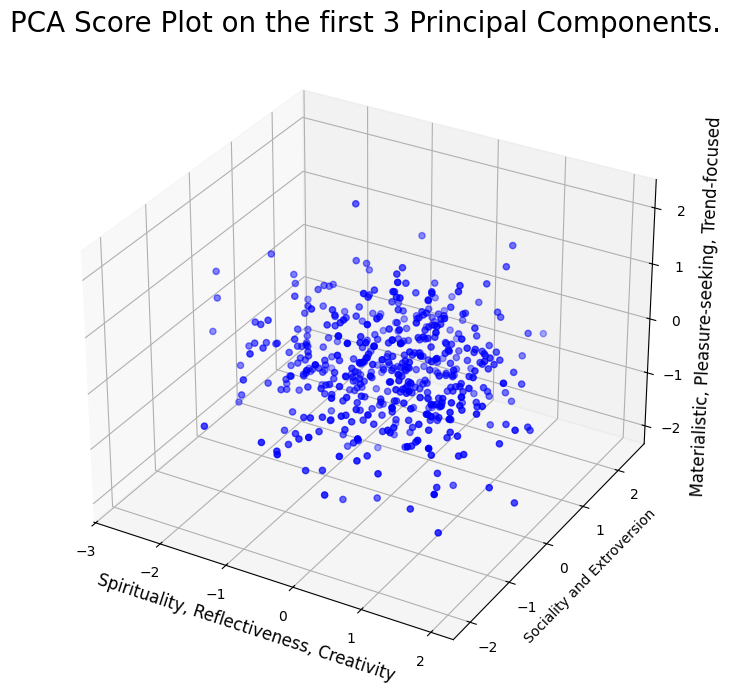

In [ ]:
# Score graph

# Since we have 5 principal compoents we reduce them to 3 in order to plot the graph
# We re-apply PCA with n=3 and we obtain the first 3 PCs and transform the data in 3d.

pca_minmax_3d= PCA(n_components=3)
pca_minmax_3d.fit(Xmm_df)
# we now transform the dataset in the new space 
y_minmax_3d=pca_minmax_3d.transform(Xmm_df)



fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(y_minmax_3d[:,0], y_minmax_3d[:,1], y_minmax_3d[:,2], c='blue', marker='o',s=20)

ax.set_title("PCA Score Plot on the first 3 Principal Components.", fontsize=20)
ax.set_xlabel('Spirituality, Reflectiveness, Creativity', fontsize=12)
ax.set_ylabel('Sociality and Extroversion', fontsize=10)
ax.set_zlabel('Materialistic, Pleasure-seeking, Trend-focused', fontsize=12,rotation=90)

fig.subplots_adjust(left=0.4, right=30, bottom=0.1, top=0.9)
plt.tight_layout()

plt.show()

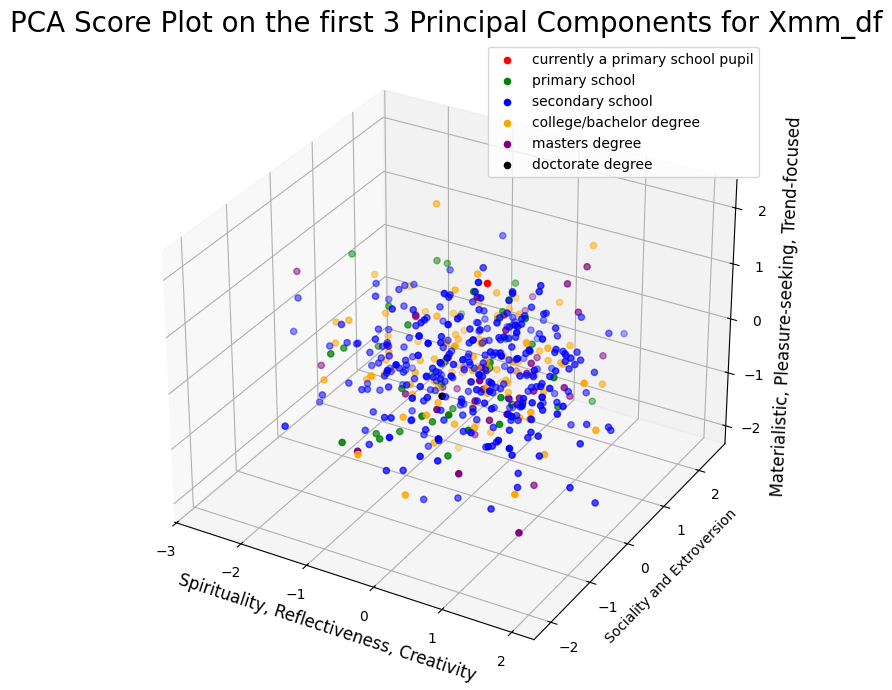

In [ ]:
colors = ['red', 'green', 'blue', 'orange',"purple","black"] 
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

education=labels_dataset.loc[:,'Education']

for ll in np.unique(education):  
    ax.scatter(
        y_minmax_3d[education== ll, 0],
        y_minmax_3d[education == ll, 1], 
        y_minmax_3d[education == ll, 2], 
        c=colors[ll-1],  # here since the education starts from 1 and ends with 6 we have to decrease by 1 
       
    )

ax.set_title("PCA Score Plot on the first 3 Principal Components for Xmm_df", fontsize=20)
ax.set_xlabel('Spirituality, Reflectiveness, Creativity', fontsize=12)
ax.set_ylabel('Sociality and Extroversion', fontsize=10)
ax.set_zlabel('Materialistic, Pleasure-seeking, Trend-focused', fontsize=12,rotation=90)

fig.subplots_adjust(left=0.4, right=30, bottom=0.1, top=0.9)
plt.tight_layout()
plt.legend(labels=["currently a primary school pupil","primary school","secondary school","college/bachelor degree","masters degree","doctorate degree"])

plt.show()

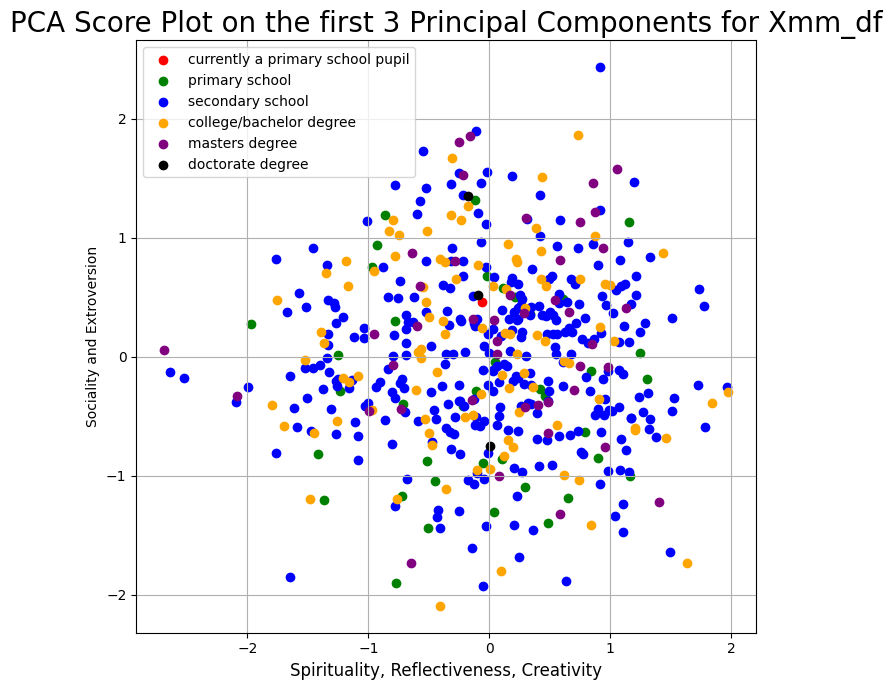

In [37]:
# 2 DIMENSIONS 
pca_minmax_2d= PCA(n_components=2)
pca_minmax_2d.fit(Xmm_df)

# we now transform the dataset in the new space 
y_minmax_2d=pca_minmax_2d.transform(Xmm_df)

colors = ['red', 'green', 'blue', 'orange',"purple","black"] 


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

education=labels_dataset.loc[:,'Education']

for ll in np.unique(education):  
    ax.scatter(
        y_minmax_2d[education== ll, 0], 
        y_minmax_2d[education == ll, 1], 
        
        c=colors[ll-1],  # here since the education starts from 1 and ends with 6 we have to decrease by 1 
       
    )

ax.set_title("PCA Score Plot on the first 3 Principal Components for Xmm_df", fontsize=20)
ax.set_xlabel('Spirituality, Reflectiveness, Creativity', fontsize=12)
ax.set_ylabel('Sociality and Extroversion', fontsize=10)


fig.subplots_adjust(left=0.4, right=30, bottom=0.1, top=0.9)
plt.tight_layout()
plt.legend(labels=["currently a primary school pupil","primary school","secondary school","college/bachelor degree","masters degree","doctorate degree"])

plt.grid()
plt.show()

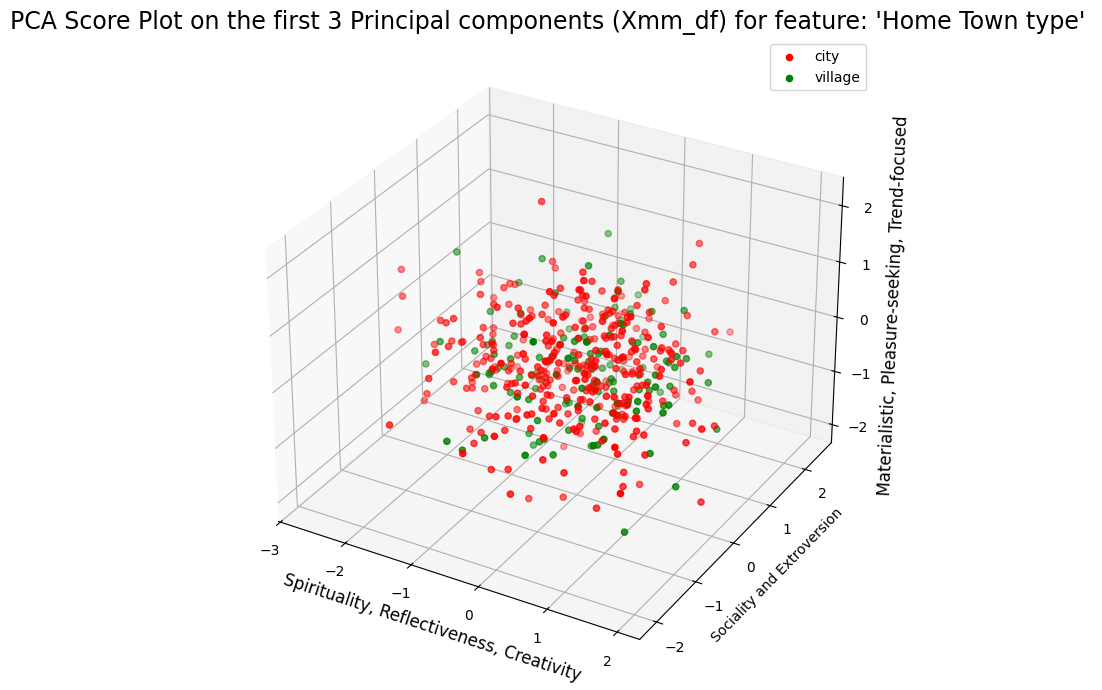

In [38]:
home_town_type=labels_dataset.loc[:,'Home Town Type']
colors = ['red', 'green'] 


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')



for ll in np.unique(home_town_type):  
    ax.scatter(
        y_minmax_3d[home_town_type== ll, 0],
        y_minmax_3d[home_town_type == ll, 1], 
        y_minmax_3d[home_town_type == ll, 2], 
        c=colors[ll-1],  # it starts from 1 and ends with 2 we have to decrease by 1 
       
    )

ax.set_title("PCA Score Plot on the first 3 Principal components (Xmm_df) for feature: 'Home Town type' ", fontsize=17)
ax.set_xlabel('Spirituality, Reflectiveness, Creativity', fontsize=12)
ax.set_ylabel('Sociality and Extroversion', fontsize=10)
ax.set_zlabel('Materialistic, Pleasure-seeking, Trend-focused', fontsize=12,rotation=90)

fig.subplots_adjust(left=0.4, right=30, bottom=0.1, top=0.9)
plt.tight_layout()
plt.legend(labels=["city","village"])

plt.show()

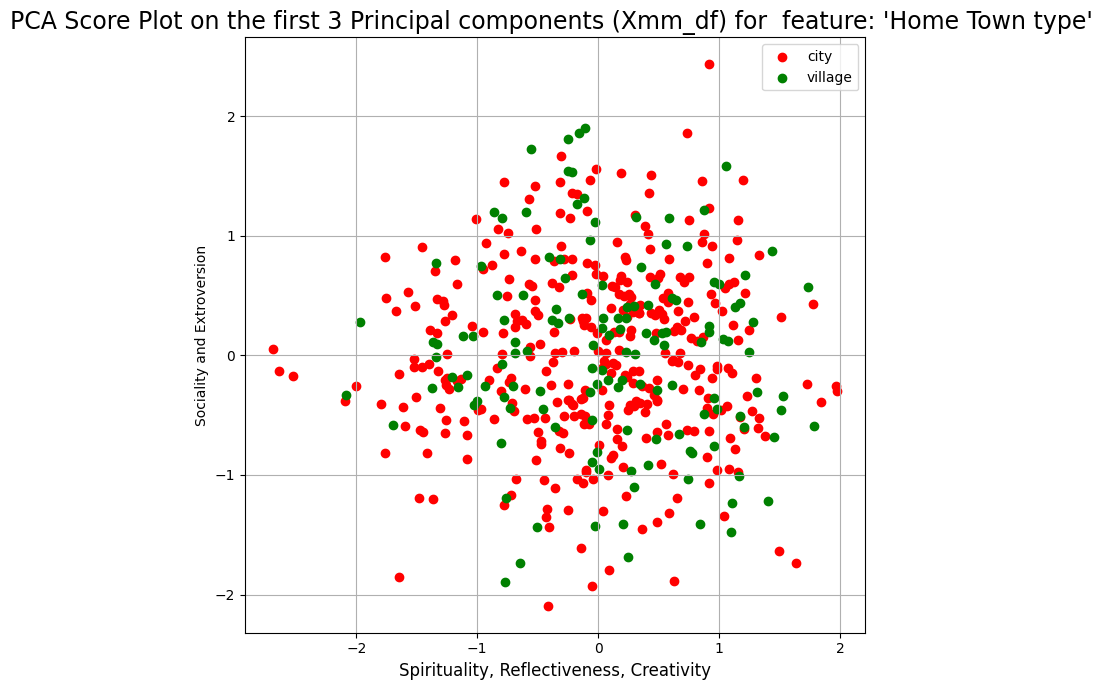

In [39]:
home_town_type=labels_dataset.loc[:,'Home Town Type']


colors = ['red', 'green'] 
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for ll in np.unique(home_town_type): 
    ax.scatter(
        y_minmax_3d[home_town_type== ll, 0],
        y_minmax_3d[home_town_type == ll, 1], 
         
        c=colors[ll-1],  # it starts from 1 and ends with 2 we have to decrease by 1 
       
    )
ax.set_title("PCA Score Plot on the first 3 Principal components (Xmm_df) for  feature: 'Home Town type' ", fontsize=17)
ax.set_xlabel('Spirituality, Reflectiveness, Creativity', fontsize=12)
ax.set_ylabel('Sociality and Extroversion', fontsize=10)

fig.subplots_adjust(left=0.4, right=30, bottom=0.1, top=0.9)
plt.tight_layout()
plt.grid()
plt.legend(labels=["city","village"])

plt.show()

5


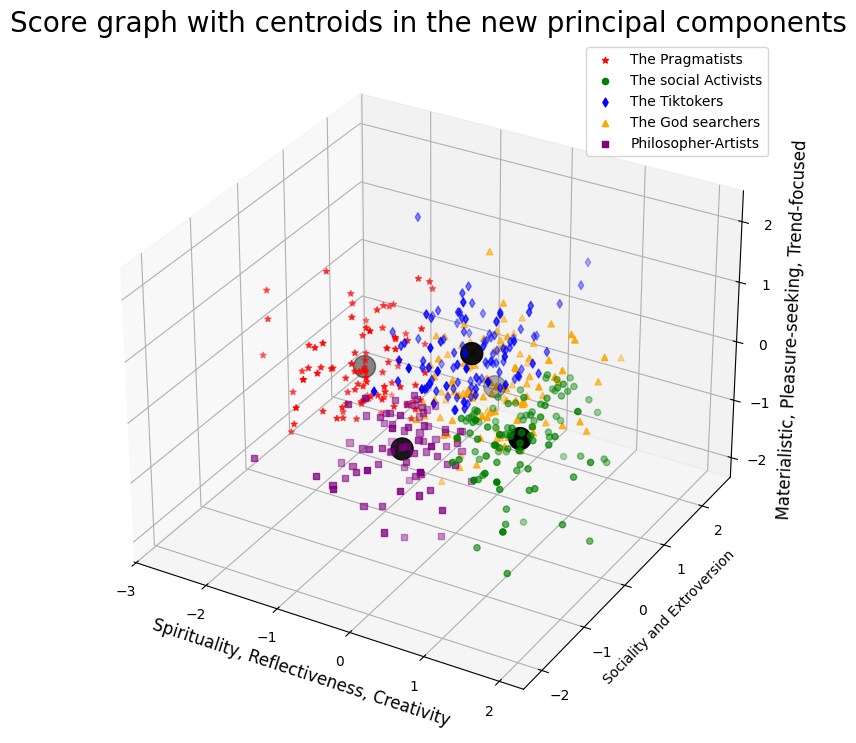

In [40]:
vector_silohuette = []

for i in range(3, 11):
    km_minmax = KMeans(n_clusters=i, random_state=random_seed)
    km_minmax.fit(y_minmax_new)
    labels = km_minmax.labels_
    silohuette = silhouette_score(y_minmax_new, labels)
    vector_silohuette.append(silohuette)

max_index_minmax = vector_silohuette.index(max(vector_silohuette))
k_best_minmax = max_index_minmax + 3


km_minmax_best = KMeans(n_clusters=k_best_minmax, random_state=random_seed)
km_minmax_best.fit(y_minmax_new)
print(k_best_minmax)



#########################################################



km_minmax_3d = KMeans(n_clusters=k_best_minmax, random_state=random_seed)
km_minmax_3d.fit(y_minmax_3d)


colors = ['red', 'green', 'blue', 'orange',"purple"] 
markers_dict = {0: '*', 1: 'o', 2: 'd', 3: '^', 4:"s"}

fig_3dscatter = plt.figure(figsize=(9, 9))
ax = fig_3dscatter.add_subplot(111, projection='3d')


for ll in np.unique(km_minmax_3d.labels_):  
    ax.scatter(
        y_minmax_3d[km_minmax_3d.labels_ == ll, 0], 
        y_minmax_3d[km_minmax_3d.labels_ == ll, 1], 
        y_minmax_3d[km_minmax_3d.labels_ == ll, 2], 
        c=colors[ll],  
        marker=markers_dict[ll]  
    )

# centroids
ax.scatter(
    km_minmax_3d.cluster_centers_[:, 0], 
    km_minmax_3d.cluster_centers_[:, 1], 
    km_minmax_3d.cluster_centers_[:, 2], 
    c='black', 
    marker='o',
    s=250
)

plt.title('Score graph with centroids in the new principal components', fontsize=20)
ax.set_xlabel('Spirituality, Reflectiveness, Creativity', fontsize=12)
ax.set_ylabel('Sociality and Extroversion', fontsize=10)
ax.set_zlabel('Materialistic, Pleasure-seeking, Trend-focused', fontsize=12, rotation=90)
ax.legend(labels=[ "The Pragmatists",

"The social Activists",
 
"The Tiktokers",

"The God searchers",

"Philosopher-Artists"
])
plt.grid()
plt.show()

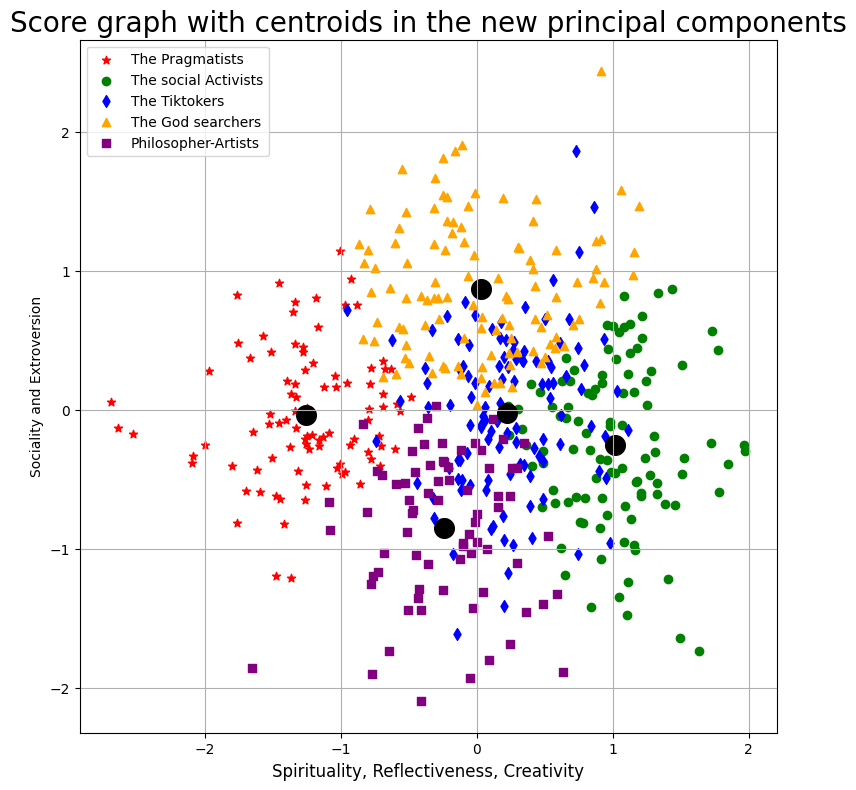

In [41]:
colors = ['red', 'green', 'blue', 'orange',"purple"]  
markers_dict = {0: '*', 1: 'o', 2: 'd', 3: '^',4:"s"}

fig_3dscatter = plt.figure(figsize=(9, 9))
ax = fig_3dscatter.add_subplot(111)


for ll in np.unique(km_minmax_3d.labels_):
    ax.scatter(
        y_minmax_3d[km_minmax_3d.labels_ == ll, 0], 
        y_minmax_3d[km_minmax_3d.labels_ == ll, 1], 
        
        c=colors[ll],  
        marker=markers_dict[ll] 
    )

#centroids
ax.scatter(
    km_minmax_3d.cluster_centers_[:, 0], 
    km_minmax_3d.cluster_centers_[:, 1], 
    c='black',  
    marker='o',
    s=200
)

plt.title('Score graph with centroids in the new principal components', fontsize=20)
ax.set_xlabel('Spirituality, Reflectiveness, Creativity', fontsize=12)
ax.set_ylabel('Sociality and Extroversion', fontsize=10)
ax.legend(labels=[ "The Pragmatists",

"The social Activists",
 
"The Tiktokers",

"The God searchers",

"Philosopher-Artists"
])
plt.grid()
plt.show()


A significant change has happened using the Xmm_df dataset: the number of clusters that maximize the silohuette score is 5 now, instead before was 4. The purple cluster seems to take away some people that previous were classified as Pragmatists (red), part of the socialite life (green) and active members of society (blue).

The names given to these clusters will be explained in details later.

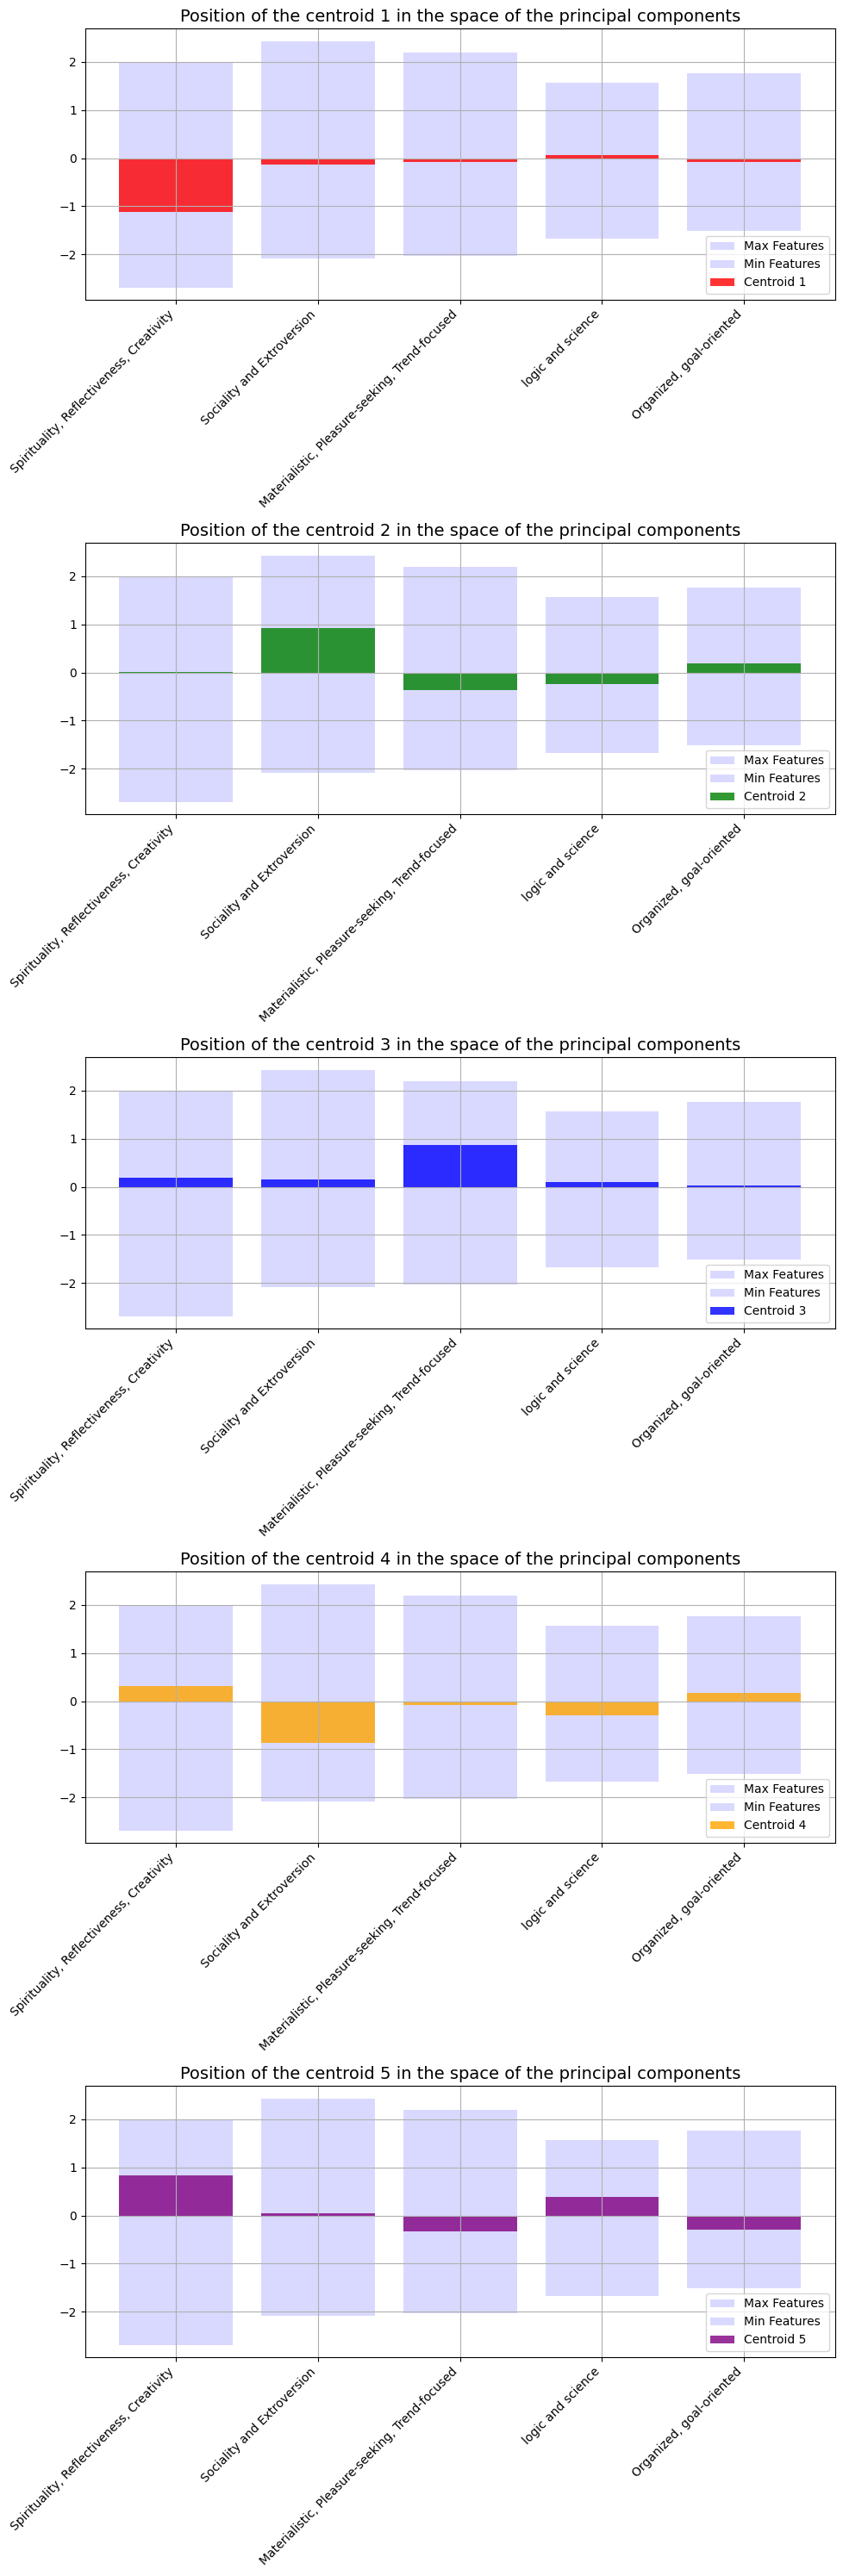

In [42]:
fig_bar, ax_bar = plt.subplots(5, 1, figsize=(10, 30)) 

color_used= ['red', 'green', 'blue', 'orange',"purple"]
a=km_minmax_best.cluster_centers_

for ii in range(5):
    
    ax_bar[ii].bar(
        np.arange(km_minmax_best.cluster_centers_.shape[1]), 
        y_minmax_new.max(axis=0), 
        color='blue', 
        alpha=0.15, 
        label='Max Features'
    )
  
    ax_bar[ii].bar(
        np.arange(km_minmax_best.cluster_centers_.shape[1]), 
        y_minmax_new.min(axis=0), 
        color='blue', 
        alpha=0.15, 
        label='Min Features'
    )
    
    ax_bar[ii].bar(
        np.arange(km_minmax_best.cluster_centers_.shape[1]), 
        km_minmax_best.cluster_centers_[ii, :], 
        color=color_used[ii], 
        alpha=0.8, 
        label=f'Centroid {ii+1}'
    )
   
    ax_bar[ii].set_xticks(ticks=np.arange(km_minmax_best.cluster_centers_.shape[1]))
    ax_bar[ii].set_xticklabels(
        labels=[
            'Spirituality, Reflectiveness, Creativity', 
            'Sociality and Extroversion', 
            "Materialistic, Pleasure-seeking, Trend-focused",
            "logic and science",
            "Organized, goal-oriented"
        ], 
        rotation=45, 
        ha='right'  
    )

    ax_bar[ii].grid(visible=True, which='both')
    ax_bar[ii].set_title(f'Position of the centroid {ii+1} in the space of the principal components', fontsize=14)
    ax_bar[ii].legend()

plt.tight_layout()
plt.show()



Intrepretation:
Centroid 1 (the red one) has basically the same characteristics as the one found with standardization so we will call this group:
"The pragmatists".

Centroid 2 (the green one) was interpreted as "The socialite life" but now this group has no component of Spirituality, Reflectiveness and Creativity, is still quite social (even more than before) but is not materialistic and tend followers, so the previous name may not be appropriate. A better interpretation of this group could be: The social Activists. Goal orented people,highly social, not materialistic life.

Centroid 3 (the blue one) is also quite different from before, it was "Active members of society" but now they barely have any social and extroversion feature, they are instead very materialistic, trend following and pleasure seeking so given that the people interviewed are mostly very young people they will be called: "The Tiktokers".

Centroid 4 (the orange one) was "The God searchers" and since the coodinates are not that different from before it is an appropriate name here.

Centroid 5 (the purple one) is composed of people that are very creative, reflective, not materialistic or goal oriented, so a good name could be: "Philosophers-Artists"


From the 3D and 2D score graphs it is kind of reasonable that people that were classified as Pragmatists, part of the socialite life and active members of society, in this new interpretation are now philosophers and art creators, they share many common traits.



Summary:

Centroid 1 = The Pragmatists

Centroid 2 = The social Activists
 
Centroid 3 = The Tiktokers

Centroid 4 = The God searchers

Centroid 5 = Philosophers-Artists



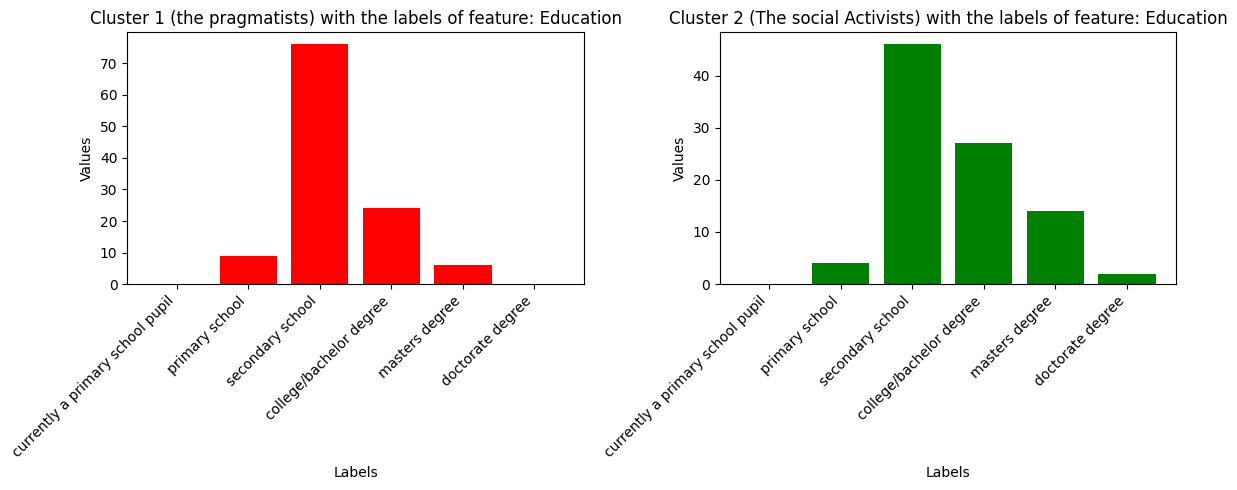

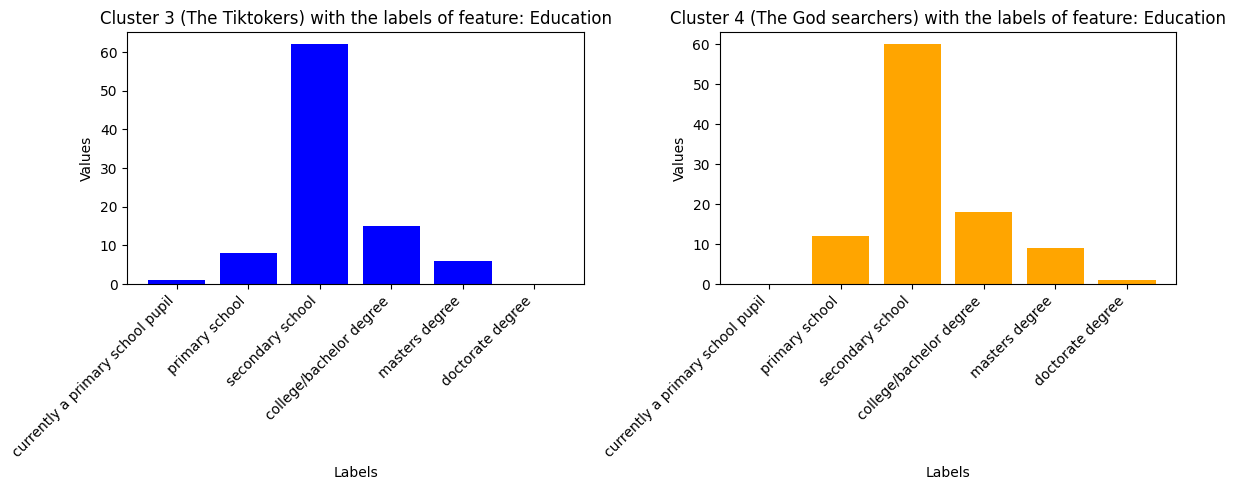

[2 3 4 5] [ 6 67 14  8]


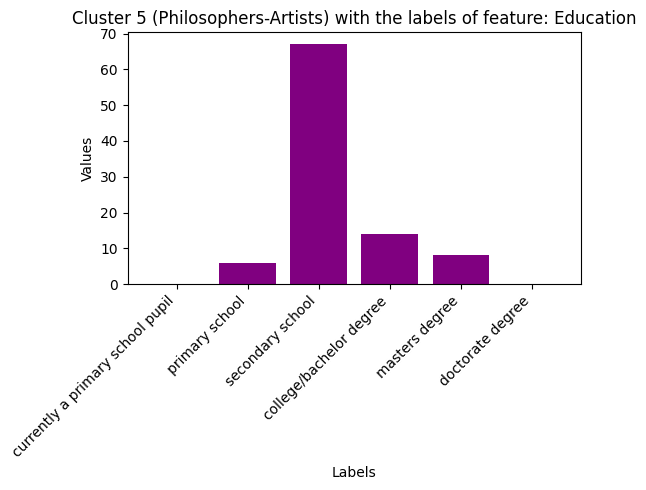

In [64]:
# External evaluation:

prediction=km_minmax_best.labels_

index_prediction_0 = [prediction[i] == 0 for i in range(len(prediction))] 
index_prediction_1 = [prediction[i] == 1 for i in range(len(prediction))] 
# I now extract the rows of the labels for the feature Education
#cluster 1:
labels_cluster_1=labels_dataset.loc[index_prediction_0,"Education"]
#cluster 2:
labels_cluster_2=labels_dataset.loc[index_prediction_1,"Education"]


unique_values_cluster_1, counts_cluster_1 = np.unique(labels_cluster_1, return_counts=True)

#print(unique_values_cluster_1,counts_cluster_1)

# here cluster 1 does not have any rows with labels 1 and 6 so I manually put 0s, because it would give me an error
labels_cluster_1_value_1=0
labels_cluster_1_value_2=counts_cluster_1[0]
labels_cluster_1_value_3=counts_cluster_1[1]
labels_cluster_1_value_4=counts_cluster_1[2]
labels_cluster_1_value_5=counts_cluster_1[3]
labels_cluster_1_value_6=0


unique_values_cluster_2, counts_cluster_2 = np.unique(labels_cluster_2, return_counts=True)
#print(unique_values_cluster_2,counts_cluster_2)
# here I do the same thing but only value 1 is missing

labels_cluster_2_value_1=0
labels_cluster_2_value_2=counts_cluster_2[0]
labels_cluster_2_value_3=counts_cluster_2[1]
labels_cluster_2_value_4=counts_cluster_2[2]
labels_cluster_2_value_5=counts_cluster_2[3]
labels_cluster_2_value_6=counts_cluster_2[4]



labels = ["currently a primary school pupil",
    "primary school",
    "secondary school",
    "college/bachelor degree",
    "masters degree",
    "doctorate degree"]

values_cluster_1 = [labels_cluster_1_value_1, labels_cluster_1_value_2,labels_cluster_1_value_3,labels_cluster_1_value_4,labels_cluster_1_value_5,labels_cluster_1_value_6] 
values_cluster_2 = [labels_cluster_2_value_1, labels_cluster_2_value_2,labels_cluster_2_value_3,labels_cluster_2_value_4,labels_cluster_2_value_5,labels_cluster_2_value_6] 

#print("Values of the first bar plot:")
#print(int(values_cluster_1[0]), int(values_cluster_1[1]))
#print("Values of the second bar plot:")
#print(int(values_cluster_2[0]), int(values_cluster_2[1]))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns


axes[0].bar(labels, values_cluster_1, color='red')
axes[0].set_xlabel('Labels')
axes[0].set_ylabel('Values')
axes[0].set_title('Cluster 1 (the pragmatists) with the labels of feature: Education')
axes[0].set_xticks(range(len(labels)))  # Set the ticks to match the labels
axes[0].set_xticklabels(labels, rotation=45, ha='right')



axes[1].bar(labels, values_cluster_2, color='green')
axes[1].set_xlabel('Labels')
axes[1].set_ylabel('Values')
axes[1].set_title('Cluster 2 (The social Activists) with the labels of feature: Education')
axes[1].set_xticks(range(len(labels)))  # Set the ticks to match the labels
axes[1].set_xticklabels(labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()




index_prediction_2 = [prediction[i] == 2 for i in range(len(prediction))] 
index_prediction_3 = [prediction[i] == 3 for i in range(len(prediction))] 


#cluster 3:
labels_cluster_3=labels_dataset.loc[index_prediction_2,"Education"]
#cluster 4:
labels_cluster_4=labels_dataset.loc[index_prediction_3,"Education"]


unique_values_cluster_3, counts_cluster_3 = np.unique(labels_cluster_3, return_counts=True)

#print(unique_values_cluster_3,counts_cluster_3)

# here cluster 3 does not have 1s so I manually put 0s, because it would give me an error
labels_cluster_1_value_1=counts_cluster_3[0]
labels_cluster_1_value_2=counts_cluster_3[1]
labels_cluster_1_value_3=counts_cluster_3[2]
labels_cluster_1_value_4=counts_cluster_3[3]
labels_cluster_1_value_5=counts_cluster_3[4]
labels_cluster_1_value_6=0


unique_values_cluster_4, counts_cluster_4 = np.unique(labels_cluster_4, return_counts=True)
#print(unique_values_cluster_4, counts_cluster_4)

# here I do the same thing here 

labels_cluster_2_value_1=0
labels_cluster_2_value_2=counts_cluster_4[0]
labels_cluster_2_value_3=counts_cluster_4[1]
labels_cluster_2_value_4=counts_cluster_4[2]
labels_cluster_2_value_5=counts_cluster_4[3]
labels_cluster_2_value_6=counts_cluster_4[4]



labels = ["currently a primary school pupil",
    "primary school",
    "secondary school",
    "college/bachelor degree",
    "masters degree",
    "doctorate degree"]

values_cluster_1 = [labels_cluster_1_value_1, labels_cluster_1_value_2,labels_cluster_1_value_3,labels_cluster_1_value_4,labels_cluster_1_value_5,labels_cluster_1_value_6] 
values_cluster_2 = [labels_cluster_2_value_1, labels_cluster_2_value_2,labels_cluster_2_value_3,labels_cluster_2_value_4,labels_cluster_2_value_5,labels_cluster_2_value_6] 
#print("Values of the first bar plot:")
#print(int(values_cluster_1[0]), int(values_cluster_1[1]))
#print("Values of the second bar plot:")
#print(int(values_cluster_2[0]), int(values_cluster_2[1]))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns


axes[0].bar(labels, values_cluster_1, color='blue')
axes[0].set_xlabel('Labels')
axes[0].set_ylabel('Values')
axes[0].set_title('Cluster 3 (The Tiktokers) with the labels of feature: Education')
axes[0].set_xticks(range(len(labels)))  # Set the ticks to match the labels
axes[0].set_xticklabels(labels, rotation=45, ha='right')

axes[1].bar(labels, values_cluster_2, color='orange')
axes[1].set_xlabel('Labels')
axes[1].set_ylabel('Values')
axes[1].set_title('Cluster 4 (The God searchers) with the labels of feature: Education')
axes[1].set_xticks(range(len(labels)))  # Set the ticks to match the labels
axes[1].set_xticklabels(labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()





index_prediction_4 = [prediction[i] == 4 for i in range(len(prediction))] 

#cluster 5:
labels_cluster_5=labels_dataset.loc[index_prediction_4,"Education"]




unique_values_cluster_5, counts_cluster_5 = np.unique(labels_cluster_5, return_counts=True)

print(unique_values_cluster_5,counts_cluster_5)

# here cluster 5 does not have 1s or 6s so I manually put 0s, because it would give me an error
labels_cluster_5_value_1=0
labels_cluster_5_value_2=counts_cluster_5[0]
labels_cluster_5_value_3=counts_cluster_5[1]
labels_cluster_5_value_4=counts_cluster_5[2]
labels_cluster_5_value_5=counts_cluster_5[3]
labels_cluster_5_value_6=0


values_cluster_5 = [labels_cluster_5_value_1, labels_cluster_5_value_2,labels_cluster_5_value_3,labels_cluster_5_value_4,labels_cluster_5_value_5,labels_cluster_5_value_6]

fig, axes = plt.subplots(1, 1, figsize=(6, 5))  

axes.bar(labels, values_cluster_5, color='purple')
axes.set_xlabel('Labels')
axes.set_ylabel('Values')
axes.set_title('Cluster 5 (Philosophers-Artists) with the labels of feature: Education')
axes.set_xticks(range(len(labels)))  # Set the ticks to match the labels
axes.set_xticklabels(labels, rotation=45, ha='right')


plt.tight_layout()
plt.show()

The main thing that stands out is the fact that in cluster 2 (social Activists) tend to be in general more educated (more college masters degree), this fact is highly reasonable since most people that "fight for some just cause" have had the opportunity to study it deeply during college or have persued univeristy in order to deepen their knowledge to better fight for it. 

The same behaviour was seen before for cluster 3 (Xstd_df) (Active members of society).

Values of the first bar plot:
87 28
Values of the second bar plot:
63 30


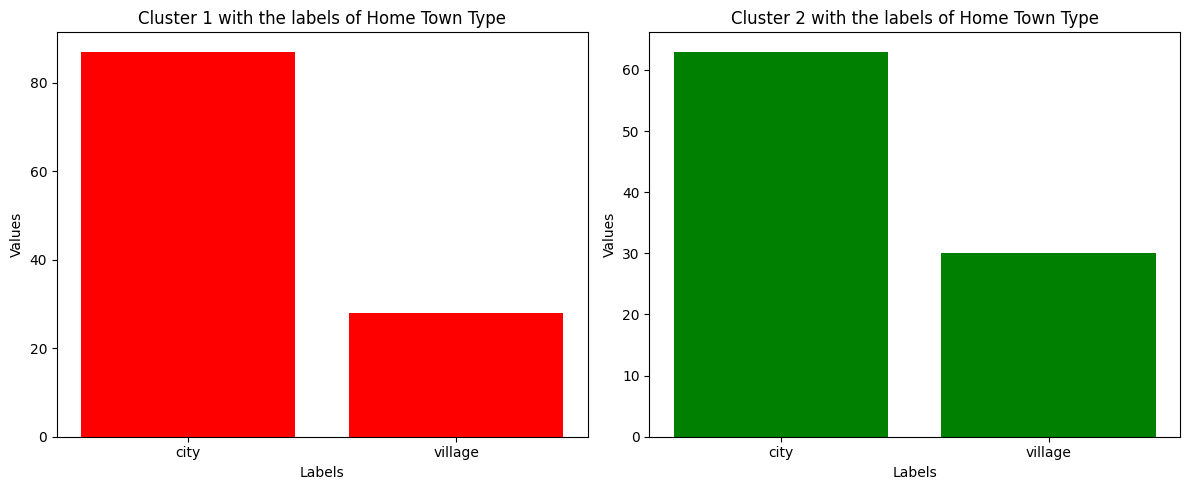

Values of the third bar plot:
69 23
Values of the forth bar plot:
74 26


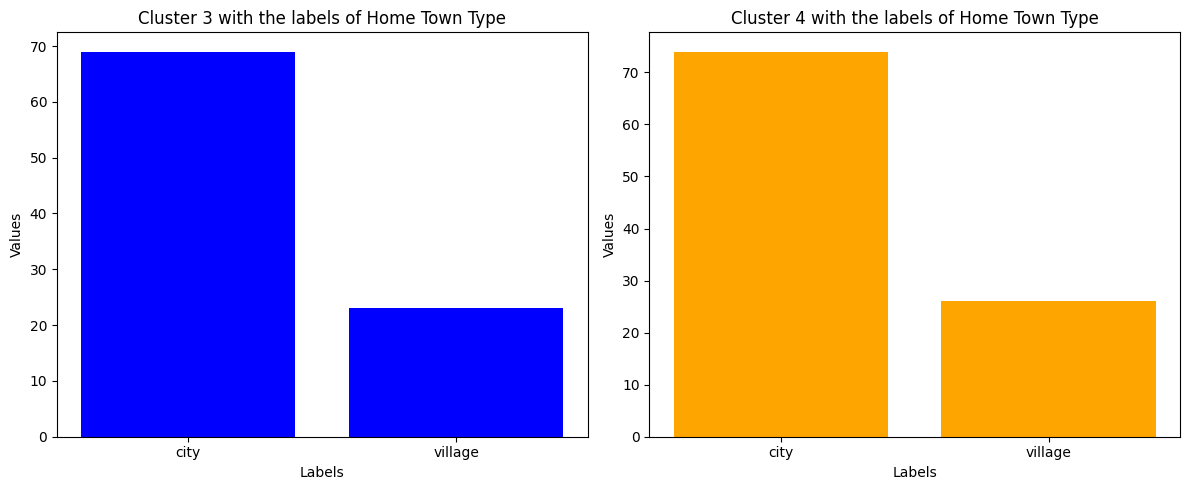

Values of the fifth bar plot:
62 33


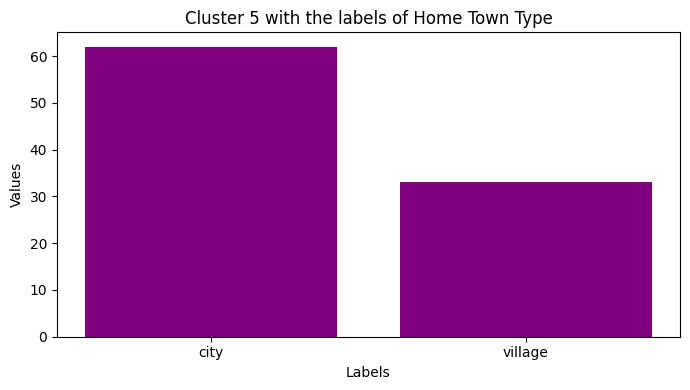

In [66]:
# External evaluation:


prediction=km_minmax_best.labels_

index_prediction_0 = [prediction[i] == 0 for i in range(len(prediction))] 
index_prediction_1 = [prediction[i] == 1 for i in range(len(prediction))] 


# I now extract the rows of the labels for the feature Home Town Type
#cluster 1:
labels_cluster_1=labels_dataset.loc[index_prediction_0,"Home Town Type"]

#cluster 2:
labels_cluster_2=labels_dataset.loc[index_prediction_1,"Home Town Type"]


unique_values_cluster_1, counts_cluster_1 = np.unique(labels_cluster_1, return_counts=True)
unique_values_cluster_2, counts_cluster_2 = np.unique(labels_cluster_2, return_counts=True)

labels_cluster_1_value_1=counts_cluster_1[0]
labels_cluster_1_value_2=counts_cluster_1[1]

labels_cluster_2_value_1=counts_cluster_2[0]
labels_cluster_2_value_2=counts_cluster_2[1]

labels = ['city', 'village']
values_cluster_1 = [labels_cluster_1_value_1, labels_cluster_1_value_2] 
values_cluster_2 = [labels_cluster_2_value_1, labels_cluster_2_value_2] 
print("Values of the first bar plot:")
print(int(values_cluster_1[0]), int(values_cluster_1[1]))
print("Values of the second bar plot:")
print(int(values_cluster_2[0]), int(values_cluster_2[1]))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  


axes[0].bar(labels, values_cluster_1, color='red')
axes[0].set_xlabel('Labels')
axes[0].set_ylabel('Values')
axes[0].set_title('Cluster 1 with the labels of Home Town Type')


axes[1].bar(labels, values_cluster_2, color='green')
axes[1].set_xlabel('Labels')
axes[1].set_ylabel('Values')
axes[1].set_title('Cluster 2 with the labels of Home Town Type')

plt.tight_layout()
plt.show()

index_prediction_2 = [prediction[i] == 2 for i in range(len(prediction))] 
index_prediction_3 = [prediction[i] == 3 for i in range(len(prediction))] 

# I now extract the rows of the labels for the feature Home Town Type
#cluster 3:
labels_cluster_3=labels_dataset.loc[index_prediction_2,"Home Town Type"]
#cluster 4:
labels_cluster_4=labels_dataset.loc[index_prediction_3,"Home Town Type"]


unique_values_cluster_3, counts_cluster_3 = np.unique(labels_cluster_3, return_counts=True)
unique_values_cluster_4, counts_cluster_4 = np.unique(labels_cluster_4, return_counts=True)

labels_cluster_3_value_1=counts_cluster_3[0]
labels_cluster_3_value_2=counts_cluster_3[1]

labels_cluster_4_value_1=counts_cluster_4[0]
labels_cluster_4_value_2=counts_cluster_4[1]

labels = ['city', 'village']
values_cluster_3 = [labels_cluster_3_value_1, labels_cluster_3_value_2] 
values_cluster_4 = [labels_cluster_4_value_1, labels_cluster_4_value_2] 
print("Values of the third bar plot:")
print(int(values_cluster_3[0]), int(values_cluster_3[1]))
print("Values of the forth bar plot:")
print(int(values_cluster_4[0]), int(values_cluster_4[1]))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  


axes[0].bar(labels, values_cluster_3, color='blue')
axes[0].set_xlabel('Labels')
axes[0].set_ylabel('Values')
axes[0].set_title('Cluster 3 with the labels of Home Town Type')


axes[1].bar(labels, values_cluster_4, color='orange')
axes[1].set_xlabel('Labels')
axes[1].set_ylabel('Values')
axes[1].set_title('Cluster 4 with the labels of Home Town Type')

plt.tight_layout()
plt.show()



index_prediction_4 = [prediction[i] == 4 for i in range(len(prediction))] 


# I now extract the rows of the labels for the feature Home Town Type
#cluster 1:
labels_cluster_5=labels_dataset.loc[index_prediction_4,"Home Town Type"]



unique_values_cluster_5, counts_cluster_5 = np.unique(labels_cluster_5, return_counts=True)


labels_cluster_5_value_1=counts_cluster_5[0]
labels_cluster_5_value_2=counts_cluster_5[1]

labels = ['city', 'village']
values_cluster_5 = [labels_cluster_5_value_1, labels_cluster_5_value_2] 

print("Values of the fifth bar plot:")
print(int(values_cluster_5[0]), int(values_cluster_5[1]))


fig, axes = plt.subplots(1, 1, figsize=(7, 4))  


axes.bar(labels, values_cluster_5, color='purple')
axes.set_xlabel('Labels')
axes.set_ylabel('Values')
axes.set_title('Cluster 5 with the labels of Home Town Type')


plt.tight_layout()
plt.show()







As seen before this feature does differentiate much among all the clusters.

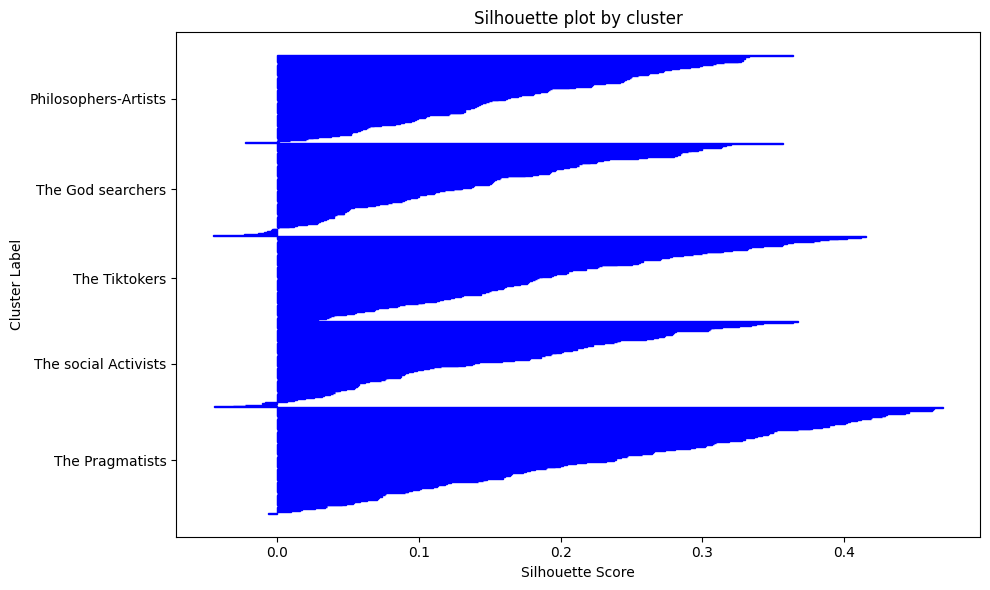

Cluster_Label
0    0.231679
1    0.149646
2    0.198894
3    0.134855
4    0.170755
Name: Silhouette_Score, dtype: float64
Overall the silhouette score is 0.1774586848837705


In [63]:
# Internal evalutation:

sample_silhouette_values = silhouette_samples(y_minmax_new, prediction)
print

results = pd.DataFrame({
    'Sample_Index': np.arange(len(sample_silhouette_values)),
    'Cluster_Label': prediction,
    'Silhouette_Score': sample_silhouette_values
})


results_sorted = results.sort_values(by=['Cluster_Label', 'Silhouette_Score'])


cluster_labels = results_sorted['Cluster_Label'].unique()
y_ticks = []
y_lower = 0

# silhouette plot
plt.figure(figsize=(10, 6))
for cluster in cluster_labels:
  
    cluster_scores = results_sorted[results_sorted['Cluster_Label'] == cluster]['Silhouette_Score']
    cluster_size = len(cluster_scores)
    
    
    plt.barh(
        range(y_lower, y_lower + cluster_size),
        cluster_scores,
        edgecolor='blue',
        label=f"Cluster {cluster}"
    )
    
   
    y_ticks.append(y_lower + 0.5 * cluster_size)
    y_lower += cluster_size


nemes_cluster=["The Pragmatists",

"The social Activists",
 
"The Tiktokers",

 "The God searchers",

"Philosophers-Artists"]
plt.yticks(y_ticks, [f"{i}" for i in nemes_cluster])
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster Label")
plt.title("Silhouette plot by cluster")

plt.tight_layout()
plt.show()

mean_silhouette_per_cluster = results.groupby('Cluster_Label')['Silhouette_Score'].mean()
print(mean_silhouette_per_cluster)

print(f"Overall the silhouette score is {vector_silohuette[1]}")

Introducing one more cluster in the k-means the silhouette scores are very similar comparing them with the ones obtained with Xstd_df. Maybe the only difference is that now it is a little harder to obtain negative silhouette scores (given that there are more clusters) and therefore a minimal increase appears.